# US Visas

In [1]:
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

## Read CSV

In [2]:
visas_df = pd.read_csv("data/us_perm_visas.csv")

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Display data types

In [3]:
visas_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 154 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   add_these_pw_job_title_9089             object 
 1   agent_city                              object 
 2   agent_firm_name                         object 
 3   agent_state                             object 
 4   application_type                        object 
 5   case_no                                 object 
 6   case_number                             object 
 7   case_received_date                      object 
 8   case_status                             object 
 9   class_of_admission                      object 
 10  country_of_citizenship                  object 
 11  country_of_citzenship                   object 
 12  decision_date                           object 
 13  employer_address_1                      object 
 14  employer_address_2                 

## Count of columns

In [4]:
print(len(visas_df.columns))

154


add_these_pw_job_title_9089
42194/374362 11%
Filled: |█████---------------------------------------------| 11.3% Rows


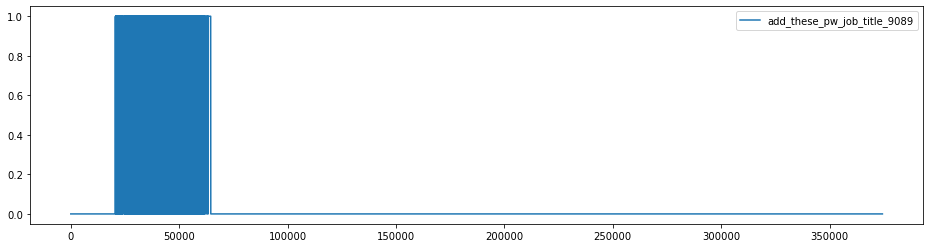


agent_city
211454/374362 56%
Filled: |████████████████████████████----------------------| 56.5% Rows


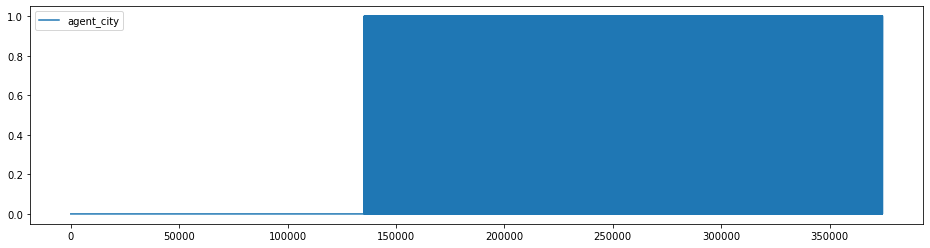


agent_firm_name
206997/374362 55%
Filled: |███████████████████████████-----------------------| 55.3% Rows


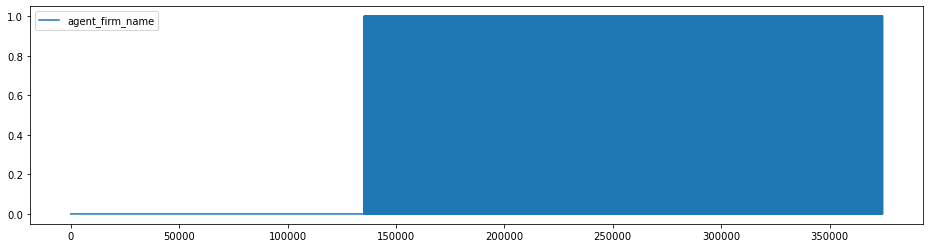


agent_state
208239/374362 56%
Filled: |███████████████████████████-----------------------| 55.6% Rows


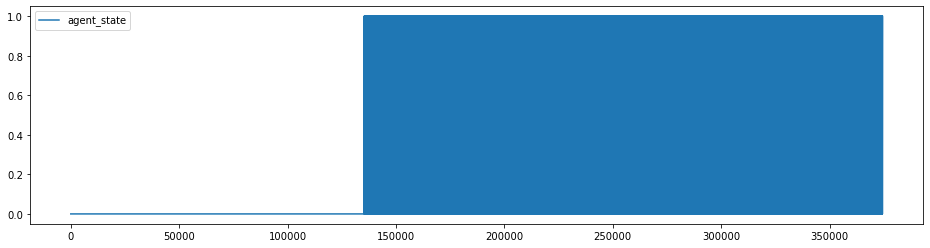


application_type
135269/374362 36%
Filled: |██████████████████--------------------------------| 36.1% Rows


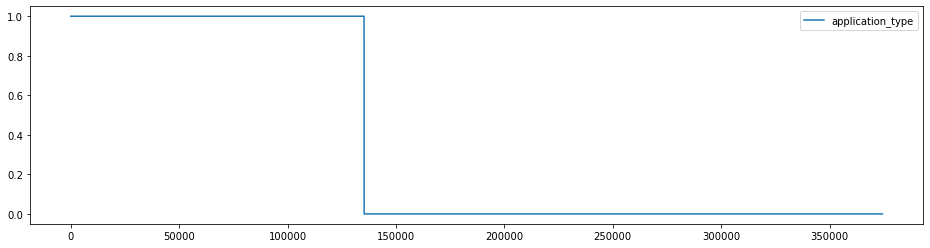


case_no
135269/374362 36%
Filled: |██████████████████--------------------------------| 36.1% Rows


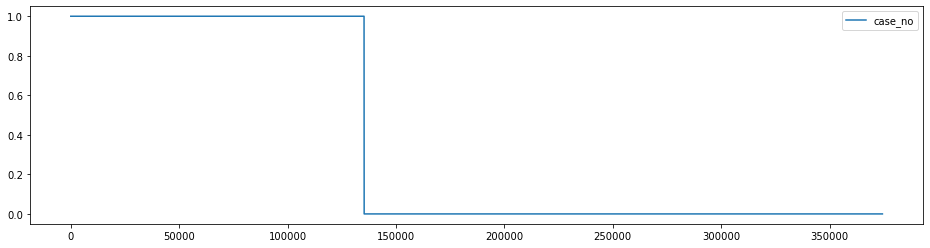


case_number
239093/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


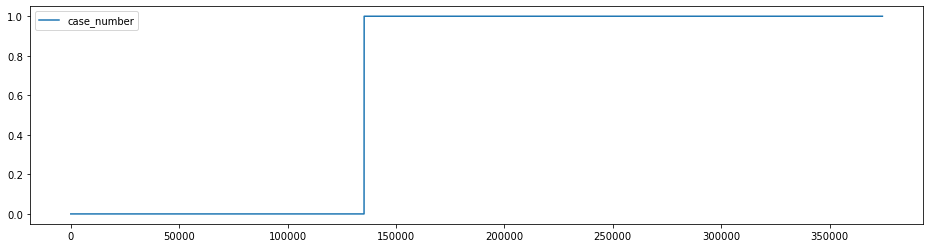


case_received_date
239091/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


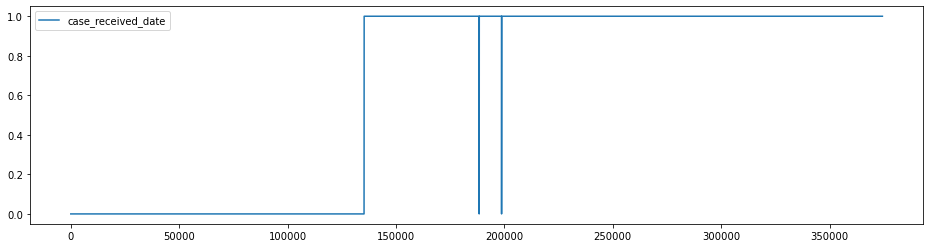


case_status
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows


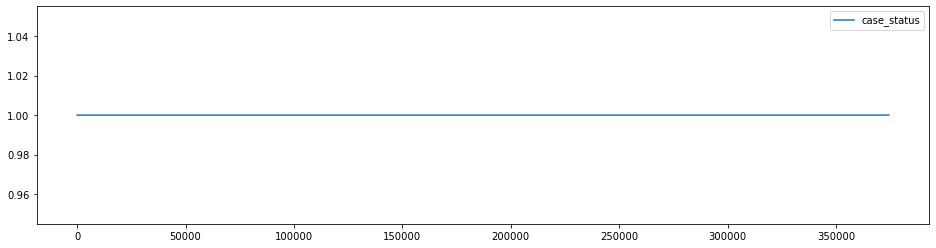


class_of_admission
351517/374362 94%
Filled: |██████████████████████████████████████████████----| 93.9% Rows


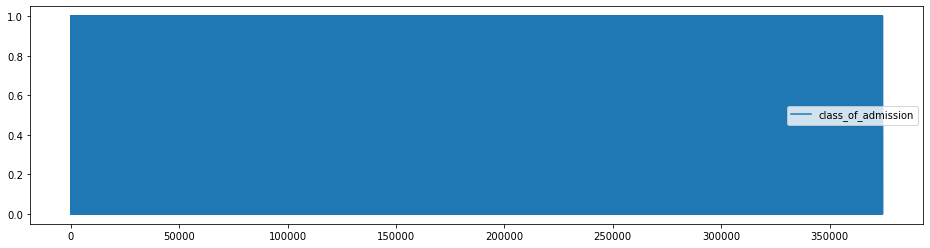


country_of_citizenship
353729/374362 94%
Filled: |███████████████████████████████████████████████---| 94.5% Rows


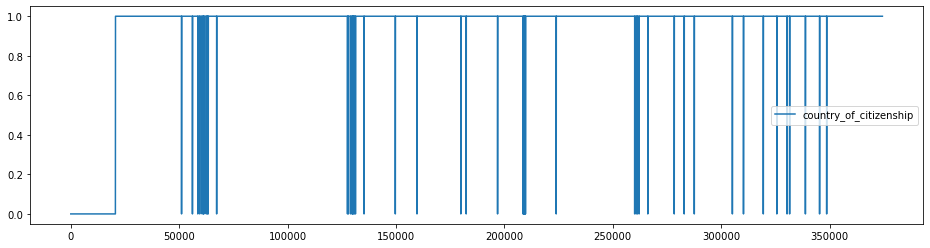


country_of_citzenship
20574/374362 5%
Filled: |██------------------------------------------------| 5.5% Rows


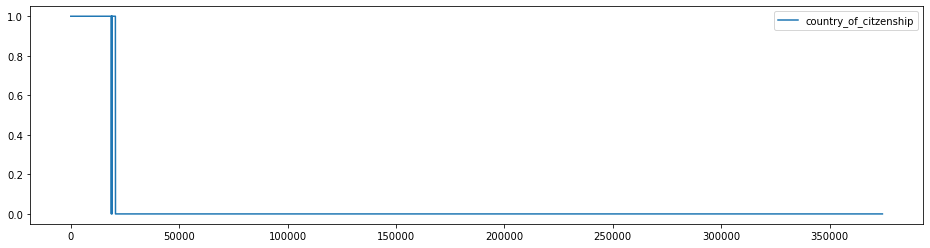


decision_date
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows


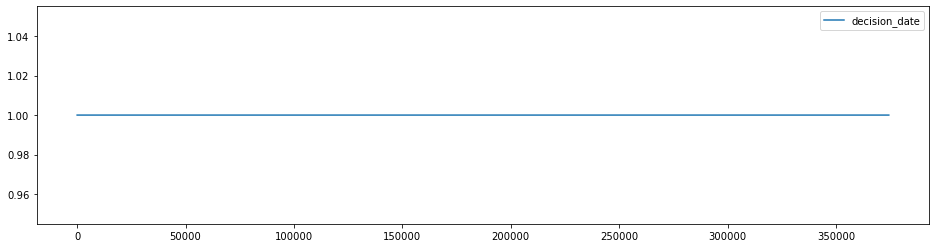


employer_address_1
374320/374362 100%
Filled: |█████████████████████████████████████████████████-| 100.0% Rows


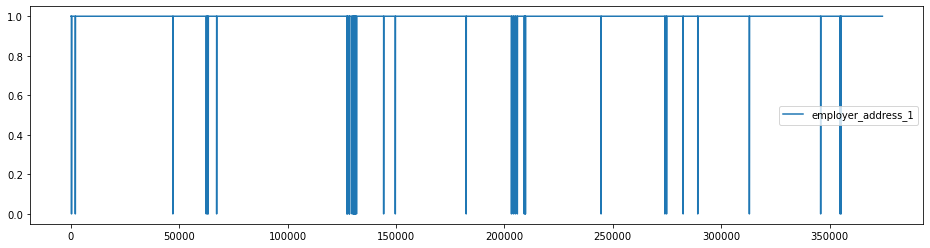


employer_address_2
225169/374362 60%
Filled: |██████████████████████████████--------------------| 60.1% Rows


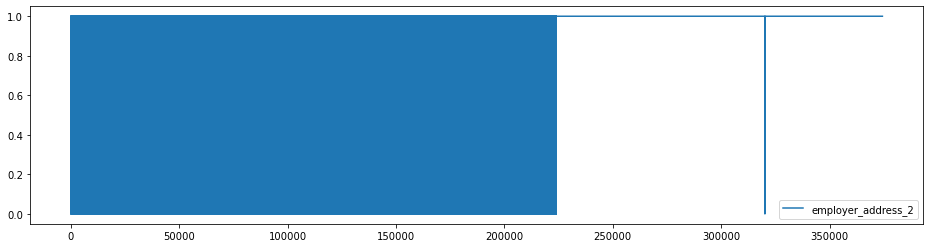


employer_city
374348/374362 100%
Filled: |█████████████████████████████████████████████████-| 100.0% Rows


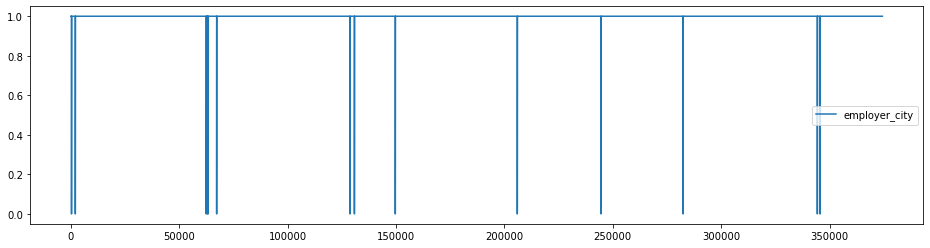


employer_country
239019/374362 64%
Filled: |███████████████████████████████-------------------| 63.8% Rows


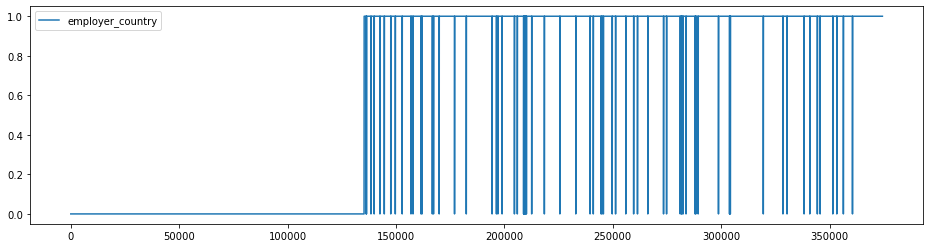


employer_decl_info_title
239054/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


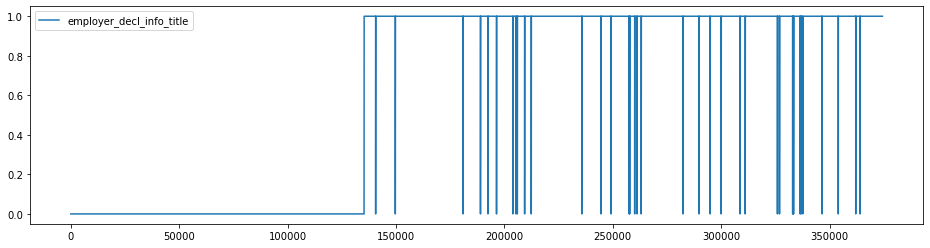


employer_name
374350/374362 100%
Filled: |█████████████████████████████████████████████████-| 100.0% Rows


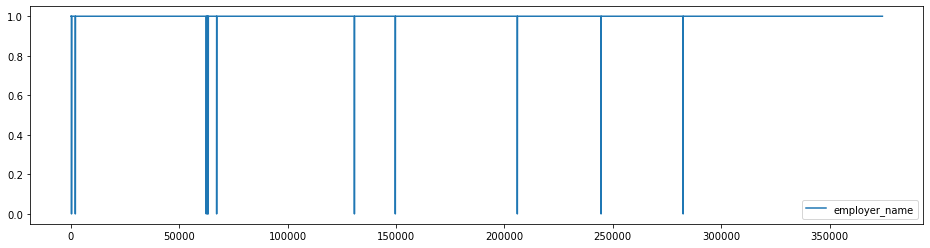


employer_num_employees
239013/374362 64%
Filled: |███████████████████████████████-------------------| 63.8% Rows


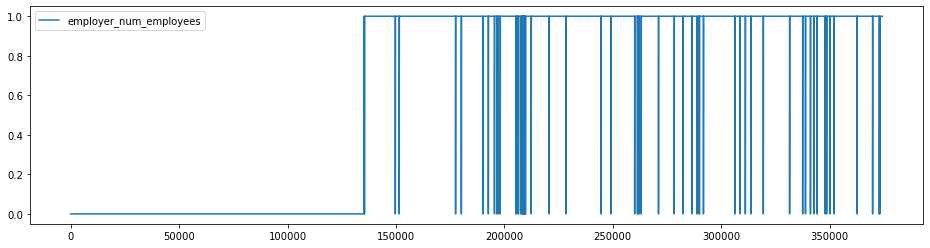


employer_phone
239057/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


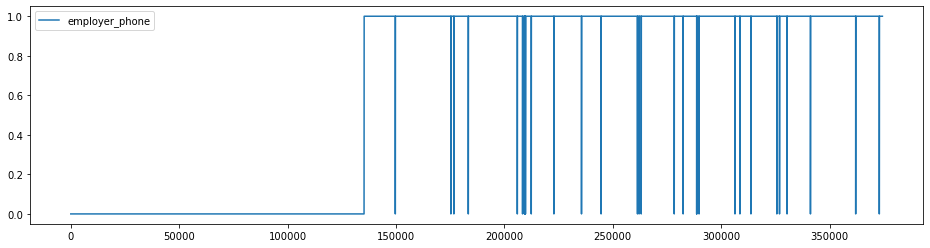


employer_phone_ext
23461/374362 6%
Filled: |███-----------------------------------------------| 6.3% Rows


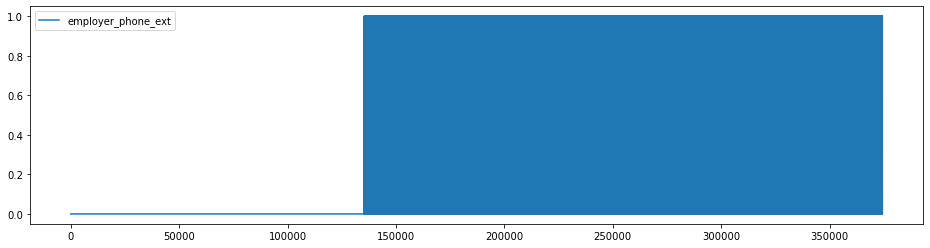


employer_postal_code
374325/374362 100%
Filled: |█████████████████████████████████████████████████-| 100.0% Rows


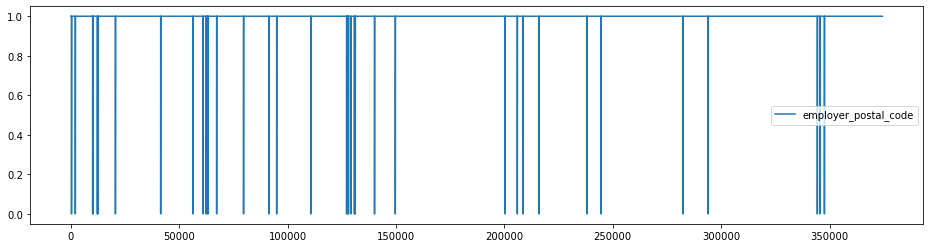


employer_state
374320/374362 100%
Filled: |█████████████████████████████████████████████████-| 100.0% Rows


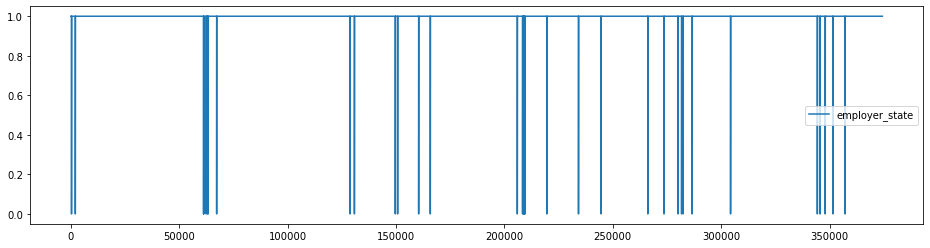


employer_yr_estab
238958/374362 64%
Filled: |███████████████████████████████-------------------| 63.8% Rows


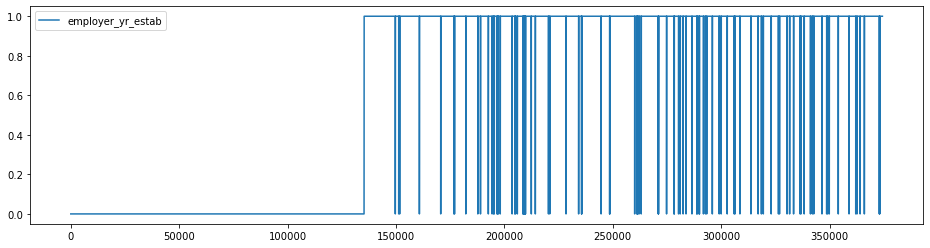


foreign_worker_info_alt_edu_experience
88625/374362 24%
Filled: |███████████---------------------------------------| 23.7% Rows


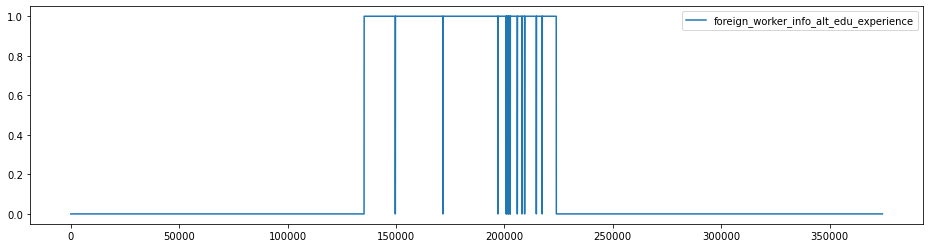


foreign_worker_info_birth_country
88628/374362 24%
Filled: |███████████---------------------------------------| 23.7% Rows


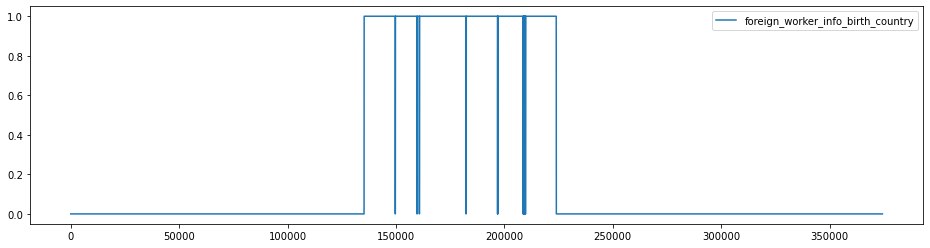


foreign_worker_info_city
239065/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


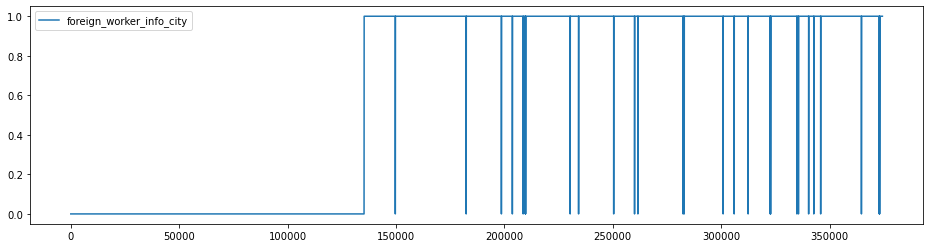


foreign_worker_info_education
239053/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


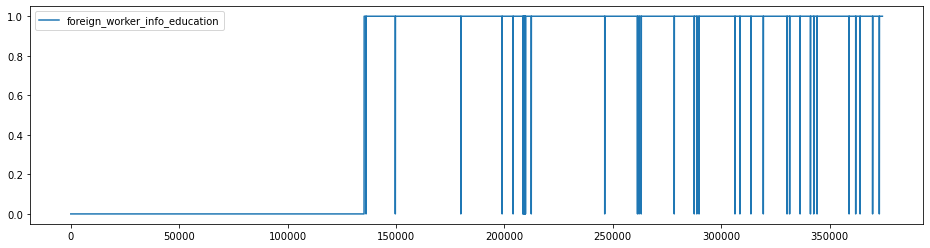


foreign_worker_info_education_other
3940/374362 1%
Filled: |--------------------------------------------------| 1.1% Rows


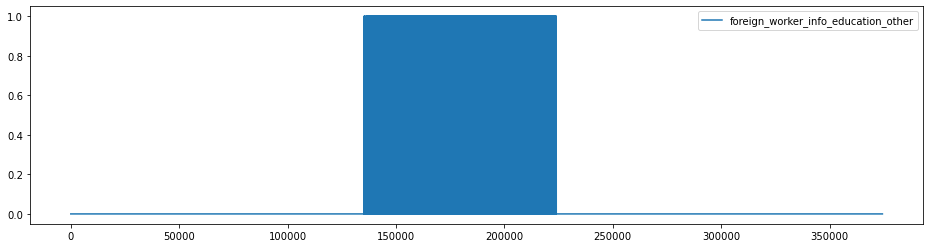


foreign_worker_info_inst
220366/374362 59%
Filled: |█████████████████████████████---------------------| 58.9% Rows


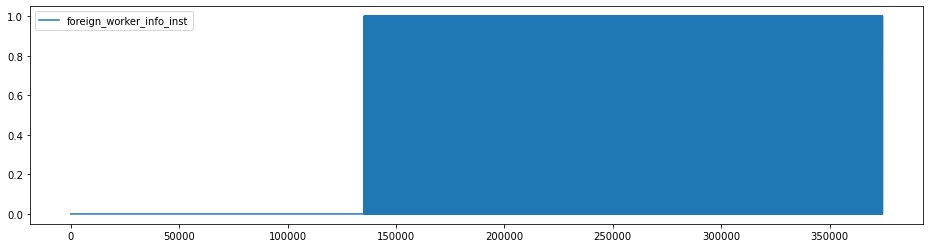


foreign_worker_info_major
219390/374362 59%
Filled: |█████████████████████████████---------------------| 58.6% Rows


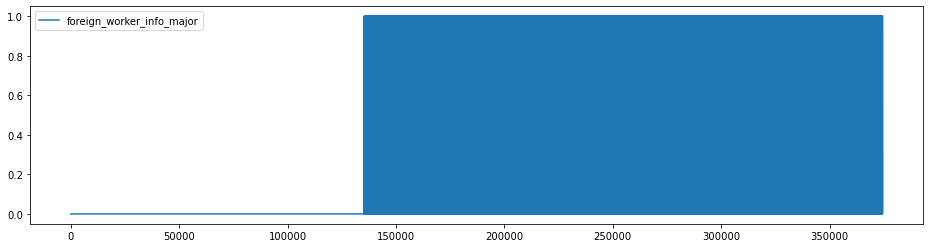


foreign_worker_info_postal_code
85897/374362 23%
Filled: |███████████---------------------------------------| 22.9% Rows


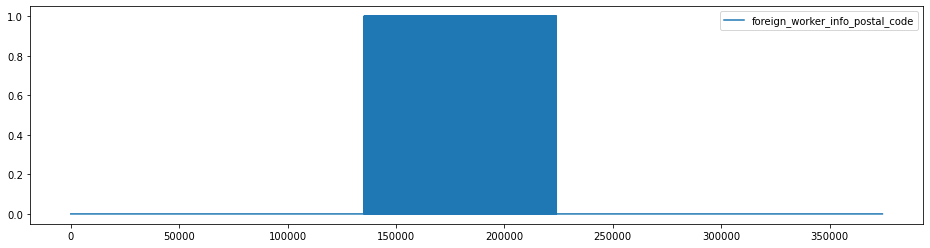


foreign_worker_info_rel_occup_exp
88633/374362 24%
Filled: |███████████---------------------------------------| 23.7% Rows


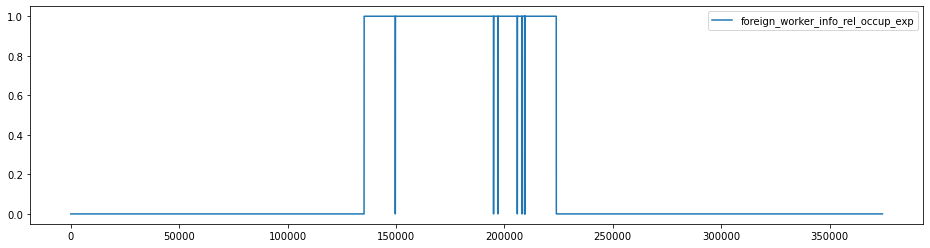


foreign_worker_info_req_experience
88635/374362 24%
Filled: |███████████---------------------------------------| 23.7% Rows


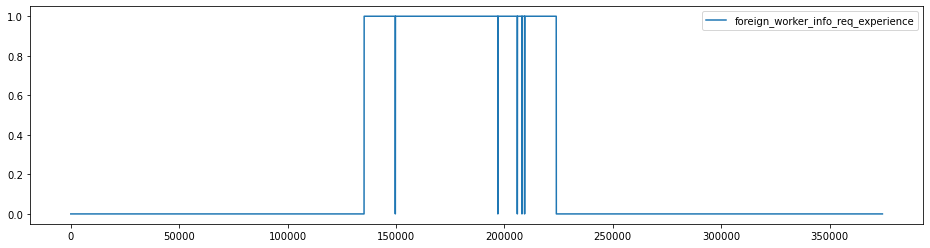


foreign_worker_info_state
221898/374362 59%
Filled: |█████████████████████████████---------------------| 59.3% Rows


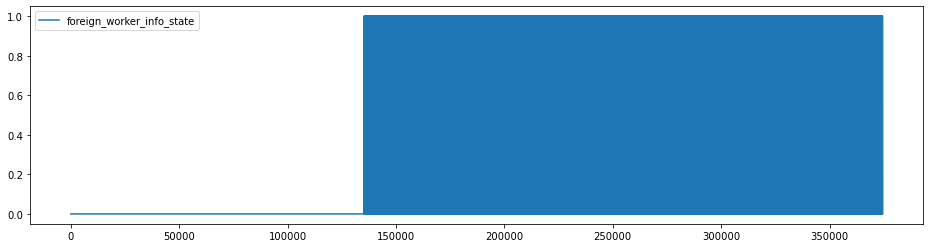


foreign_worker_info_training_comp
88634/374362 24%
Filled: |███████████---------------------------------------| 23.7% Rows


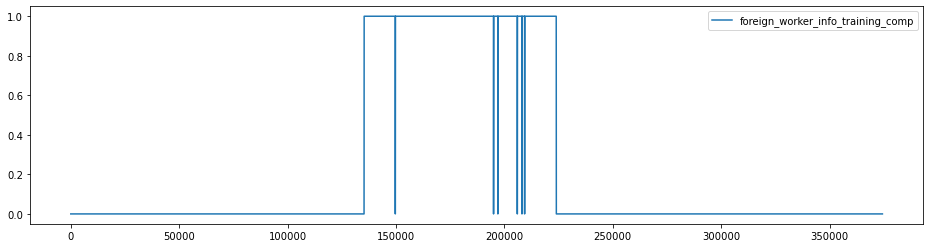


foreign_worker_ownership_interest
88638/374362 24%
Filled: |███████████---------------------------------------| 23.7% Rows


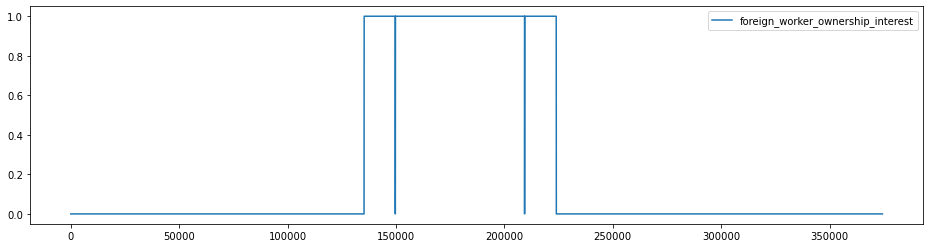


foreign_worker_yr_rel_edu_completed
83364/374362 22%
Filled: |███████████---------------------------------------| 22.3% Rows


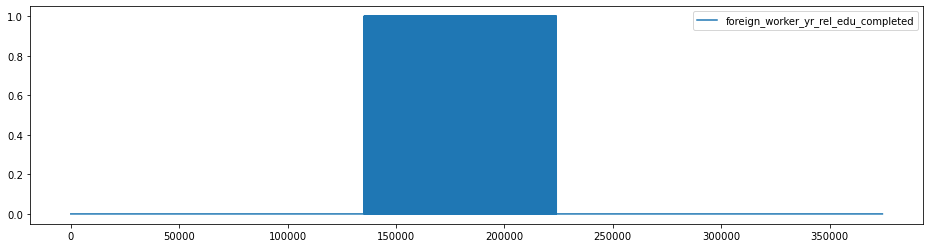


fw_info_alt_edu_experience
150446/374362 40%
Filled: |████████████████████------------------------------| 40.2% Rows


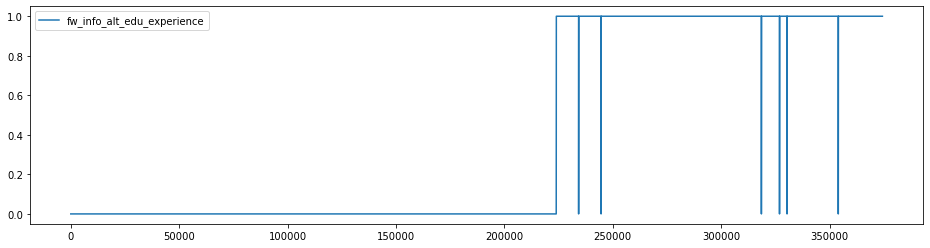


fw_info_birth_country
150434/374362 40%
Filled: |████████████████████------------------------------| 40.2% Rows


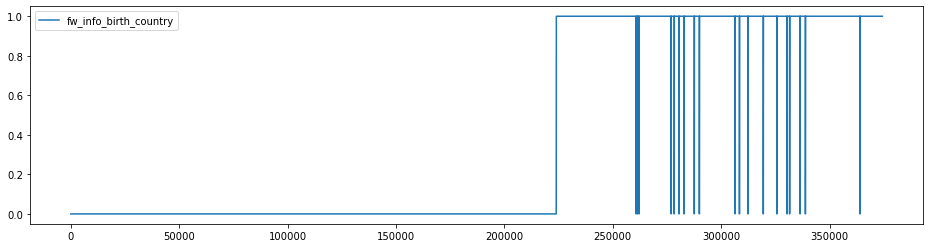


fw_info_education_other
150015/374362 40%
Filled: |████████████████████------------------------------| 40.1% Rows


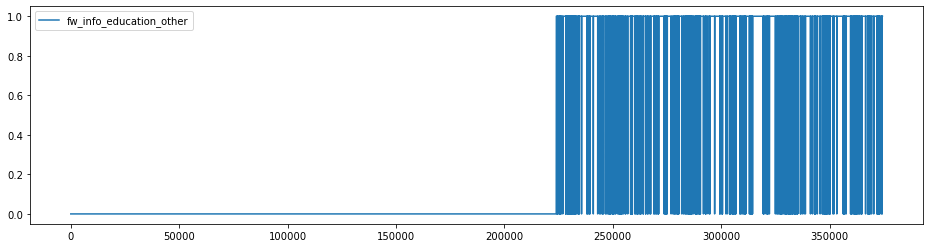


fw_info_postal_code
148219/374362 40%
Filled: |███████████████████-------------------------------| 39.6% Rows


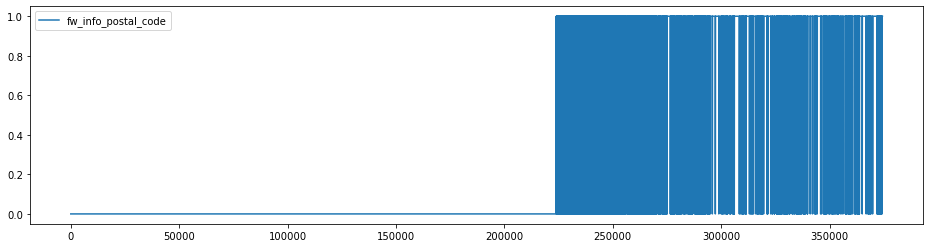


fw_info_rel_occup_exp
150443/374362 40%
Filled: |████████████████████------------------------------| 40.2% Rows


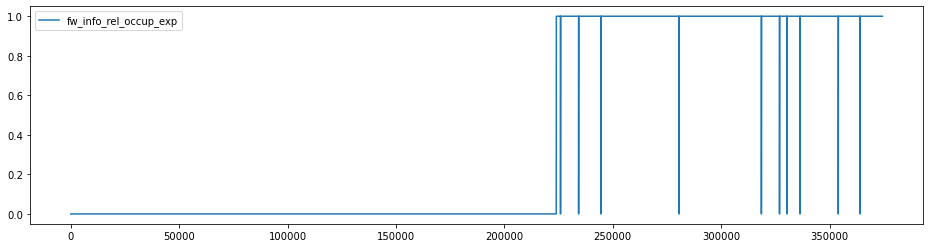


fw_info_req_experience
150447/374362 40%
Filled: |████████████████████------------------------------| 40.2% Rows


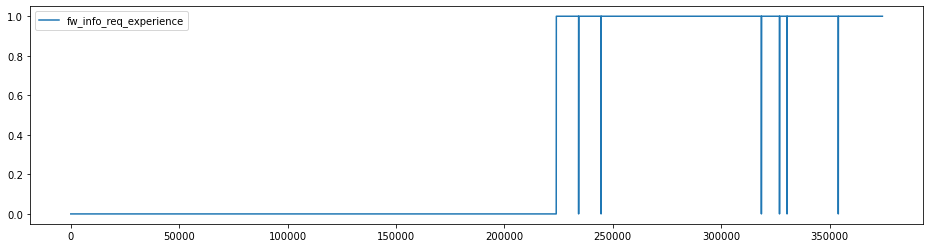


fw_info_training_comp
150444/374362 40%
Filled: |████████████████████------------------------------| 40.2% Rows


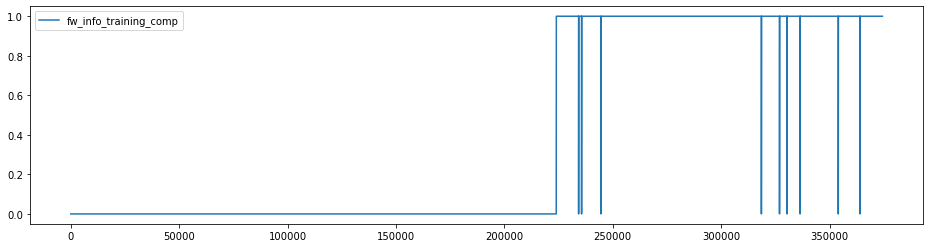


fw_info_yr_rel_edu_completed
137198/374362 37%
Filled: |██████████████████--------------------------------| 36.6% Rows


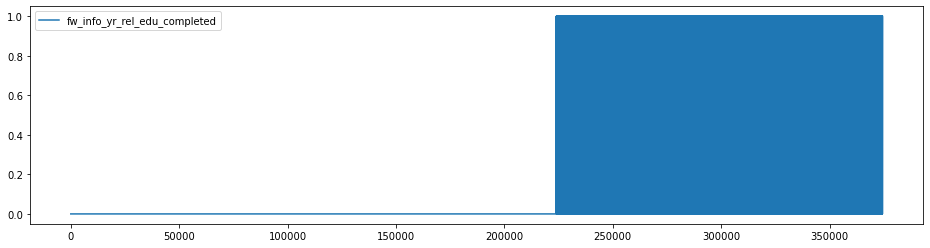


fw_ownership_interest
150445/374362 40%
Filled: |████████████████████------------------------------| 40.2% Rows


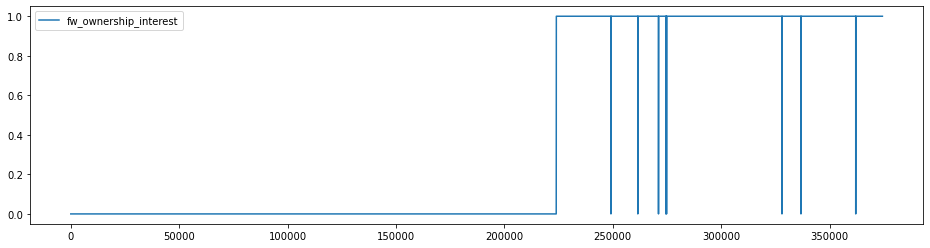


ji_foreign_worker_live_on_premises
88637/374362 24%
Filled: |███████████---------------------------------------| 23.7% Rows


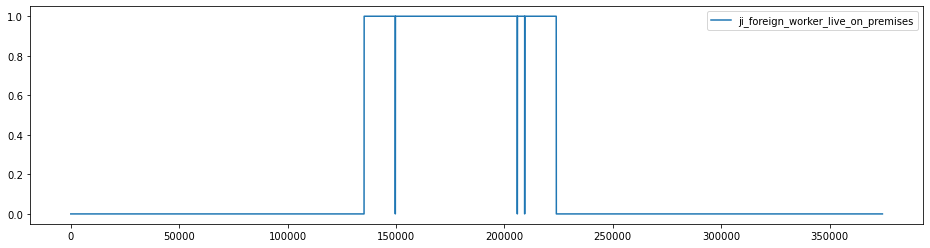


ji_fw_live_on_premises
150446/374362 40%
Filled: |████████████████████------------------------------| 40.2% Rows


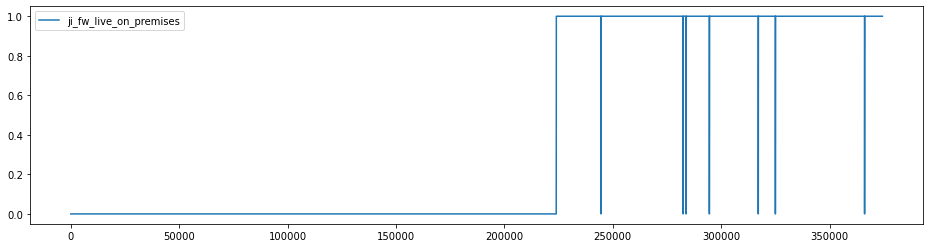


ji_live_in_dom_svc_contract
2398/374362 1%
Filled: |--------------------------------------------------| 0.6% Rows


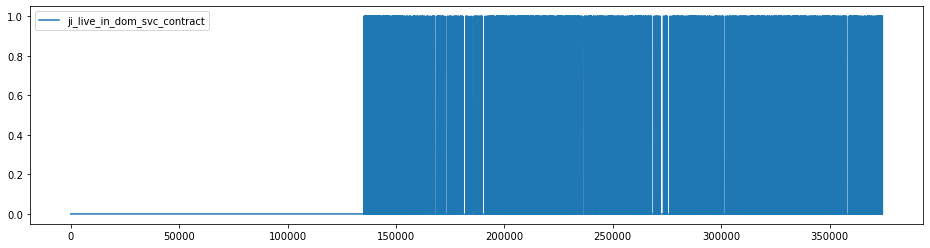


ji_live_in_domestic_service
239080/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


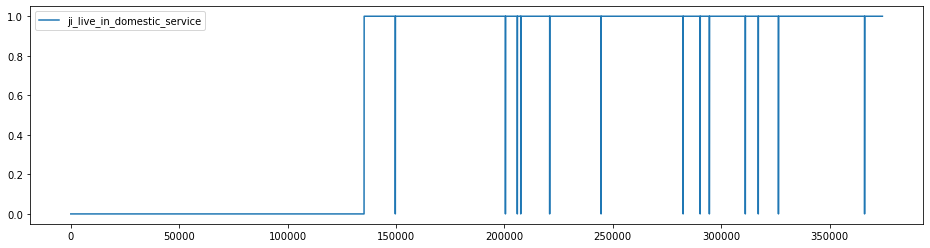


ji_offered_to_sec_j_foreign_worker
88637/374362 24%
Filled: |███████████---------------------------------------| 23.7% Rows


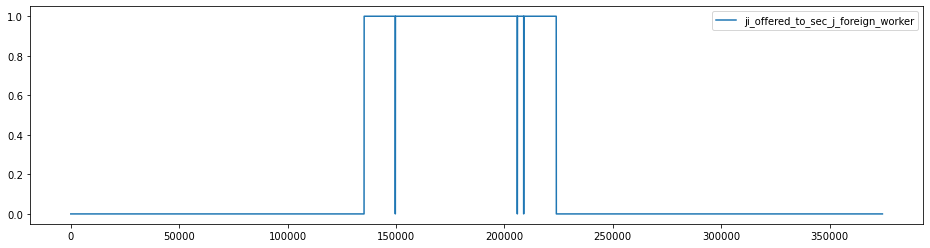


ji_offered_to_sec_j_fw
150446/374362 40%
Filled: |████████████████████------------------------------| 40.2% Rows


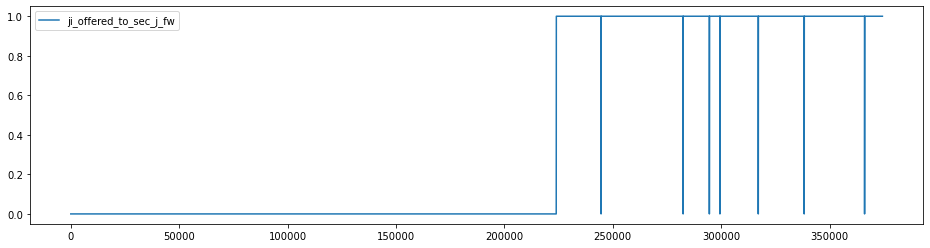


job_info_alt_cmb_ed_oth_yrs
70220/374362 19%
Filled: |█████████-----------------------------------------| 18.8% Rows


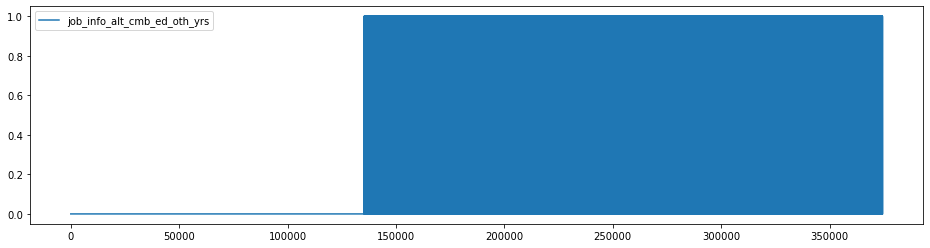


job_info_alt_combo_ed
70548/374362 19%
Filled: |█████████-----------------------------------------| 18.8% Rows


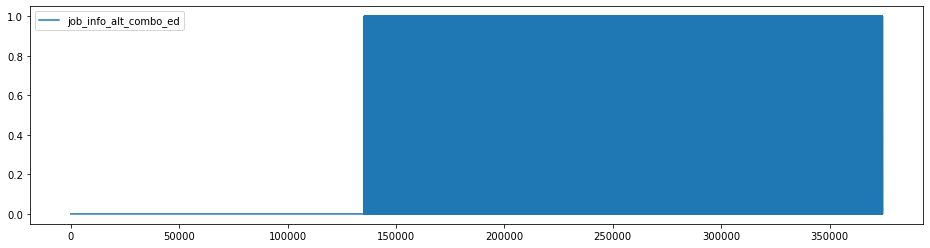


job_info_alt_combo_ed_exp
239058/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


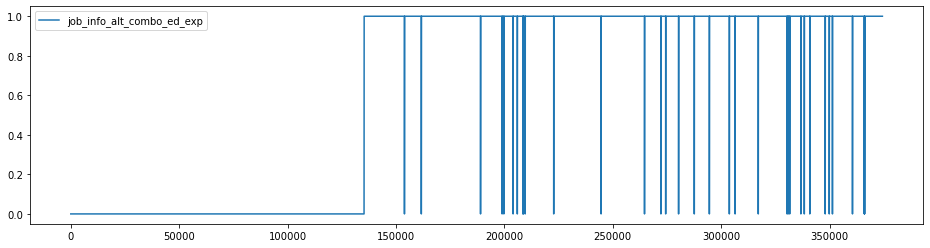


job_info_alt_combo_ed_other
9214/374362 2%
Filled: |█-------------------------------------------------| 2.5% Rows


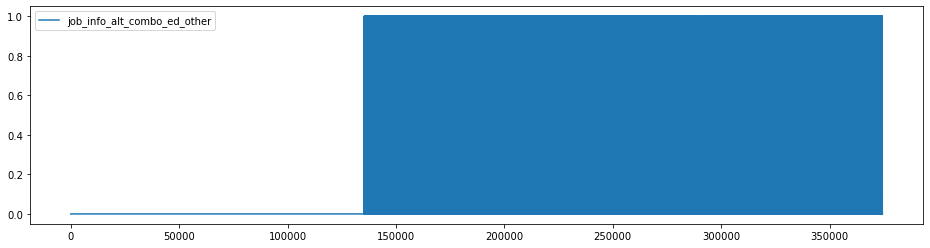


job_info_alt_field
239059/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


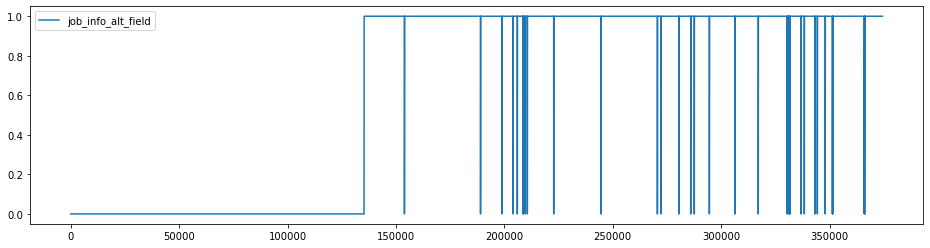


job_info_alt_field_name
93428/374362 25%
Filled: |████████████--------------------------------------| 25.0% Rows


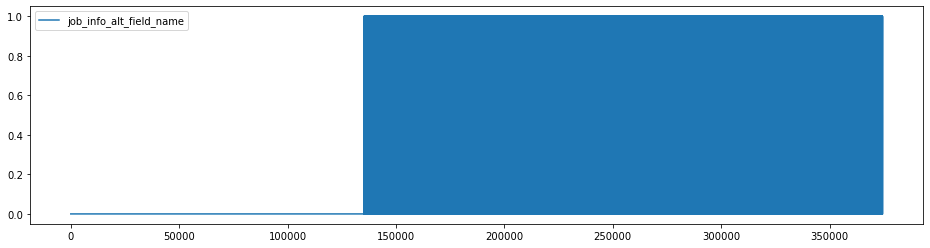


job_info_alt_occ
149020/374362 40%
Filled: |███████████████████-------------------------------| 39.8% Rows


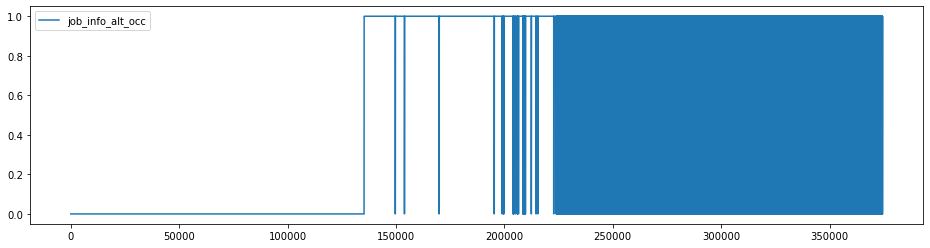


job_info_alt_occ_job_title
147400/374362 39%
Filled: |███████████████████-------------------------------| 39.4% Rows


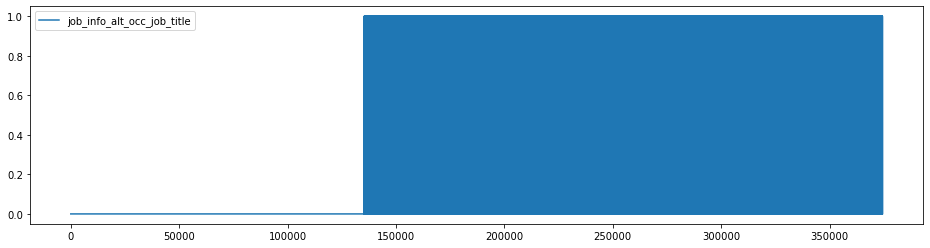


job_info_alt_occ_num_months
147200/374362 39%
Filled: |███████████████████-------------------------------| 39.3% Rows


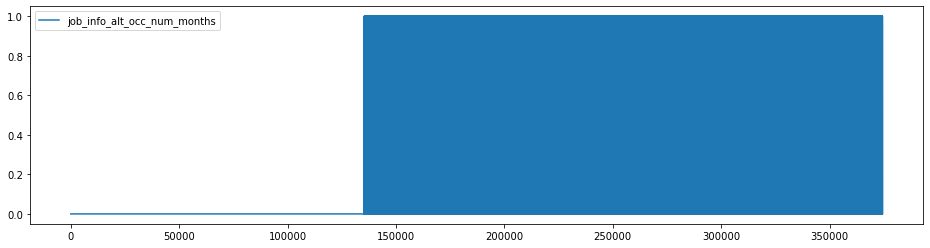


job_info_combo_occupation
239083/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


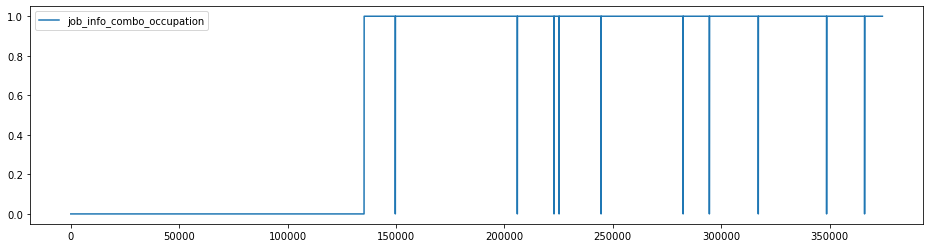


job_info_education
239080/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


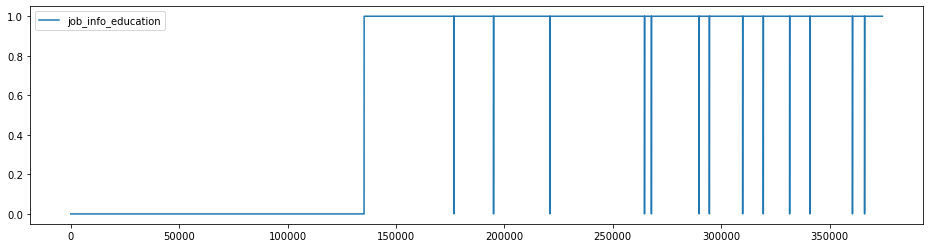


job_info_education_other
7769/374362 2%
Filled: |█-------------------------------------------------| 2.1% Rows


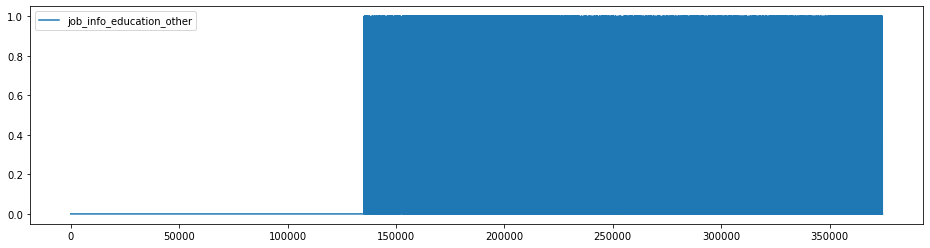


job_info_experience
239081/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


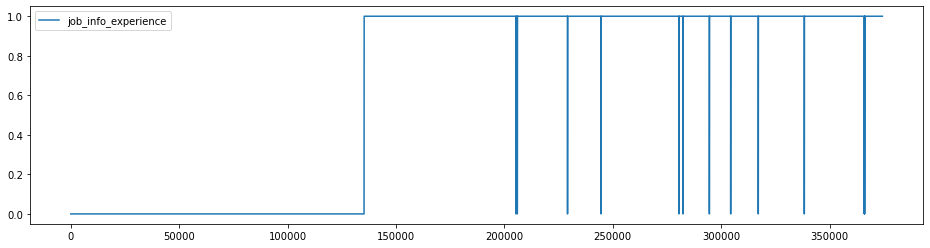


job_info_experience_num_months
133188/374362 36%
Filled: |█████████████████---------------------------------| 35.6% Rows


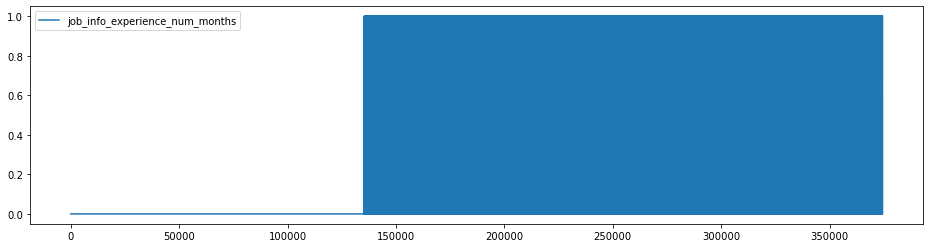


job_info_foreign_ed
238862/374362 64%
Filled: |███████████████████████████████-------------------| 63.8% Rows


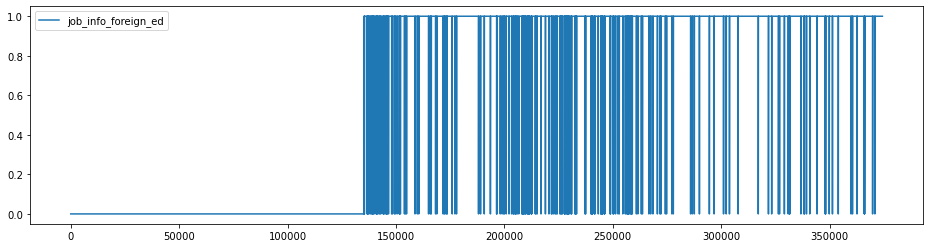


job_info_foreign_lang_req
239076/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


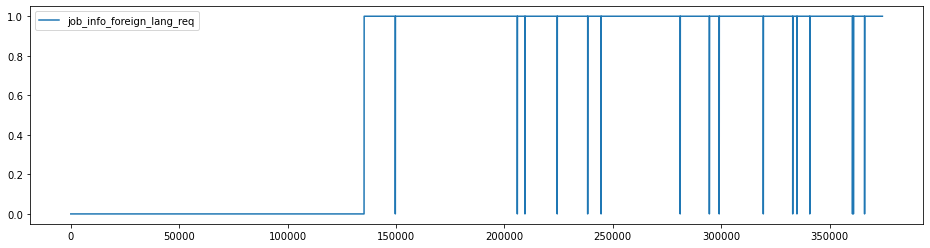


job_info_job_req_normal
239079/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


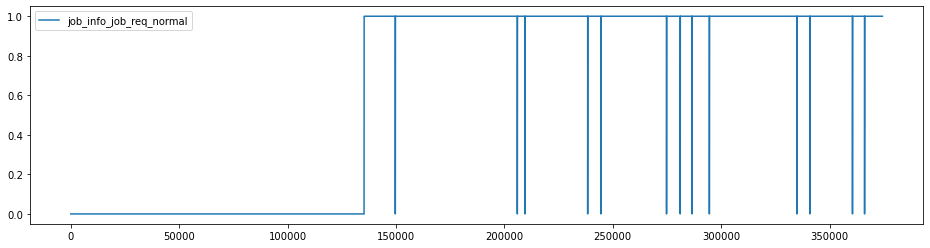


job_info_job_title
239049/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


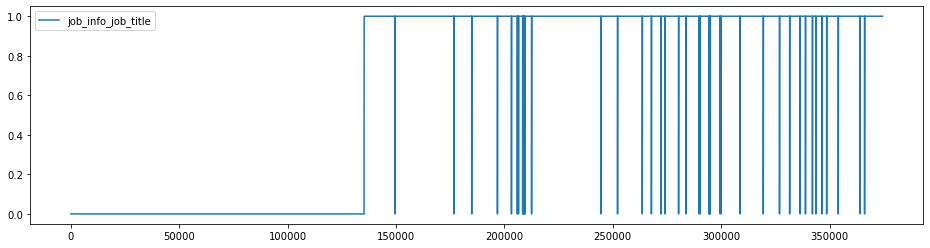


job_info_major
212639/374362 57%
Filled: |████████████████████████████----------------------| 56.8% Rows


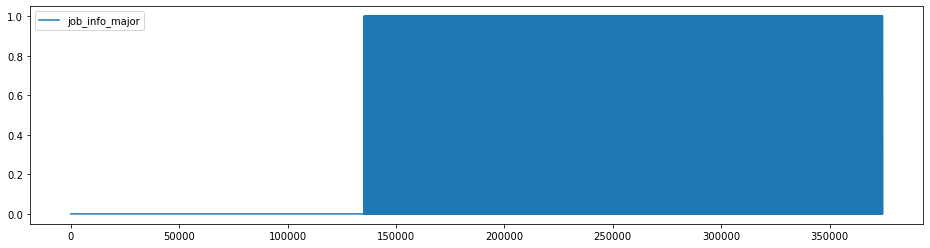


job_info_training
239078/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


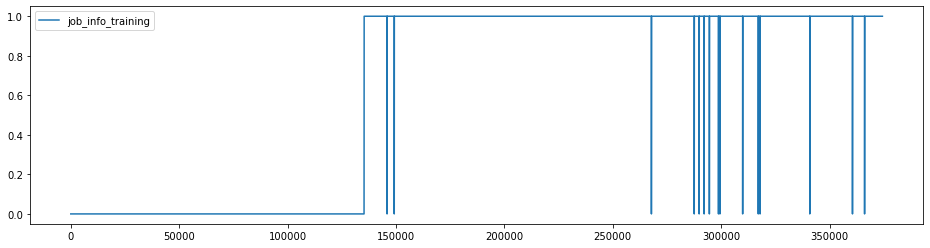


job_info_training_field
4479/374362 1%
Filled: |--------------------------------------------------| 1.2% Rows


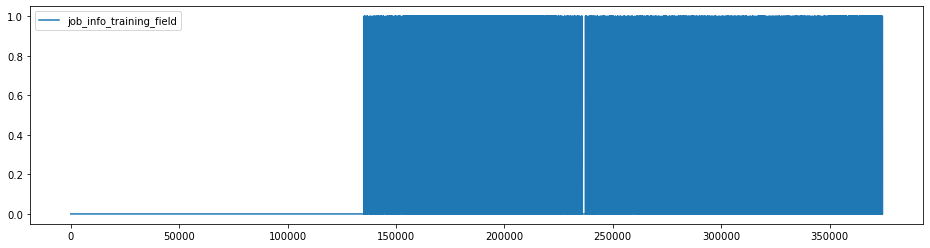


job_info_training_num_months
4779/374362 1%
Filled: |--------------------------------------------------| 1.3% Rows


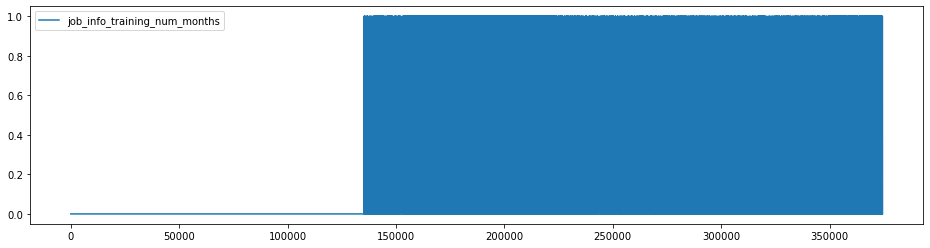


job_info_work_city
374260/374362 100%
Filled: |█████████████████████████████████████████████████-| 100.0% Rows


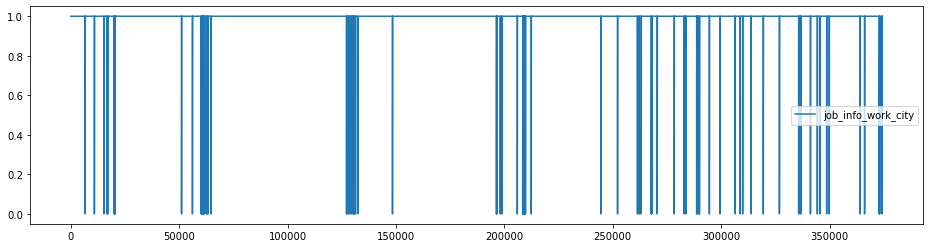


job_info_work_postal_code
239009/374362 64%
Filled: |███████████████████████████████-------------------| 63.8% Rows


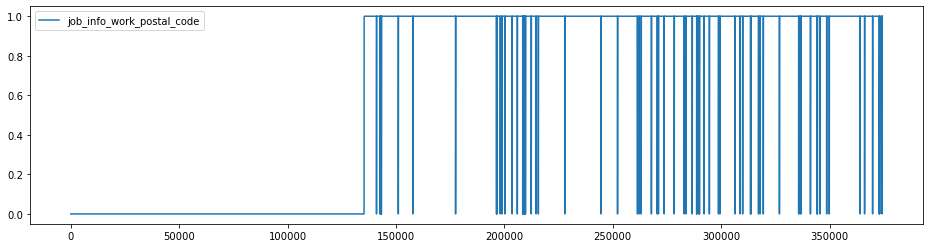


job_info_work_state
374259/374362 100%
Filled: |█████████████████████████████████████████████████-| 100.0% Rows


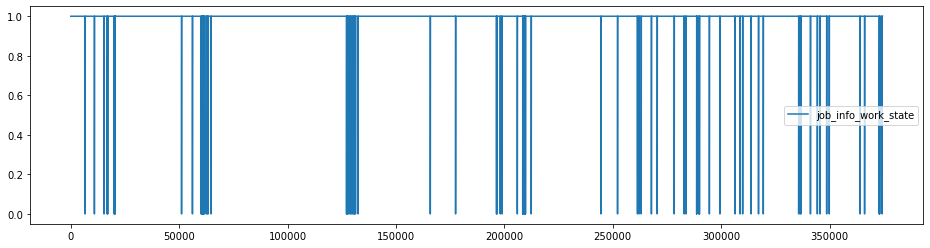


naics_2007_us_code
20516/374362 5%
Filled: |██------------------------------------------------| 5.5% Rows


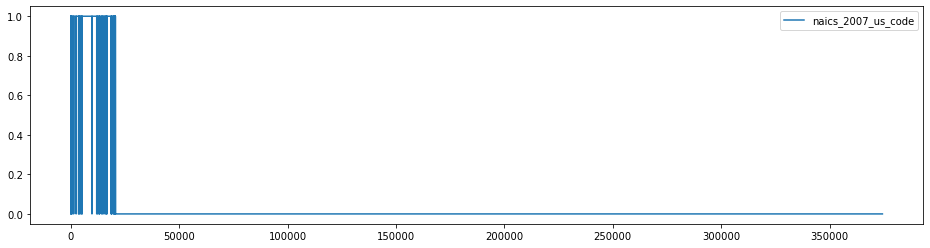


naics_2007_us_title
19900/374362 5%
Filled: |██------------------------------------------------| 5.3% Rows


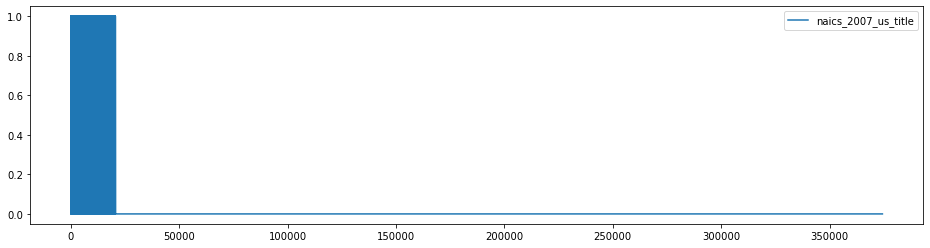


naics_code
88433/374362 24%
Filled: |███████████---------------------------------------| 23.6% Rows


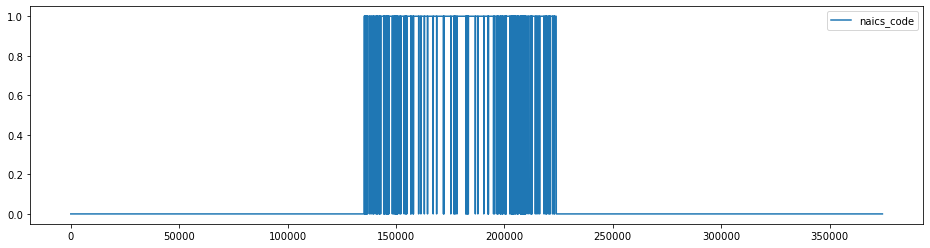


naics_title
88433/374362 24%
Filled: |███████████---------------------------------------| 23.6% Rows


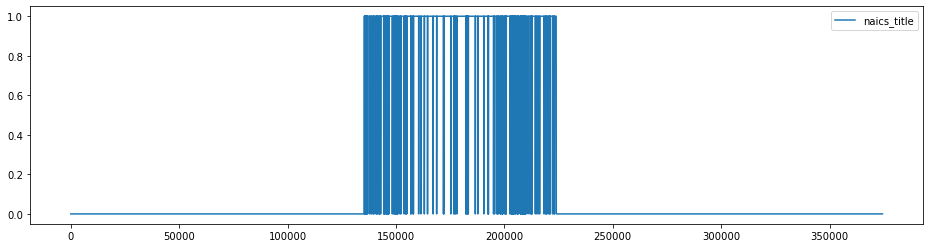


naics_us_code
150129/374362 40%
Filled: |████████████████████------------------------------| 40.1% Rows


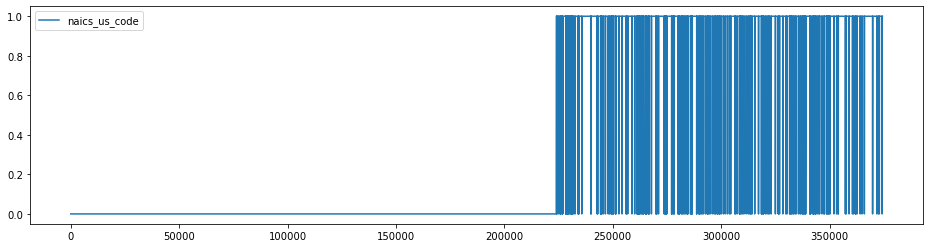


naics_us_code_2007
114301/374362 31%
Filled: |███████████████-----------------------------------| 30.5% Rows


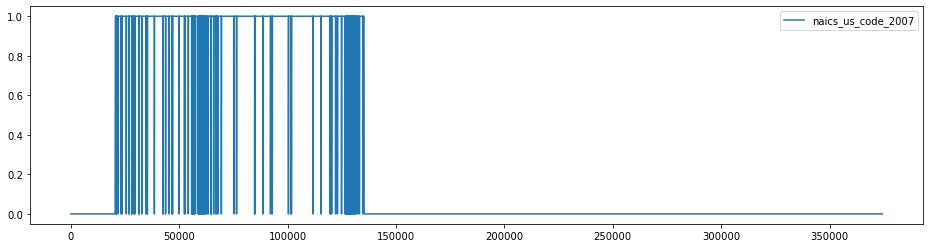


naics_us_title
150129/374362 40%
Filled: |████████████████████------------------------------| 40.1% Rows


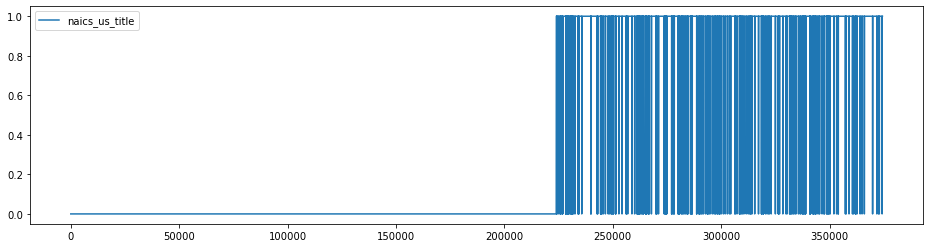


naics_us_title_2007
111246/374362 30%
Filled: |██████████████------------------------------------| 29.7% Rows


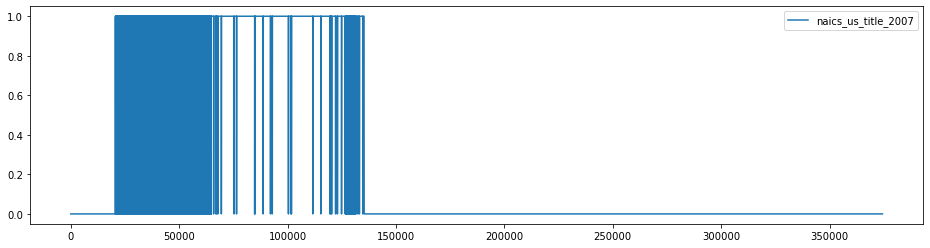


orig_case_no
294/374362 0%
Filled: |--------------------------------------------------| 0.1% Rows


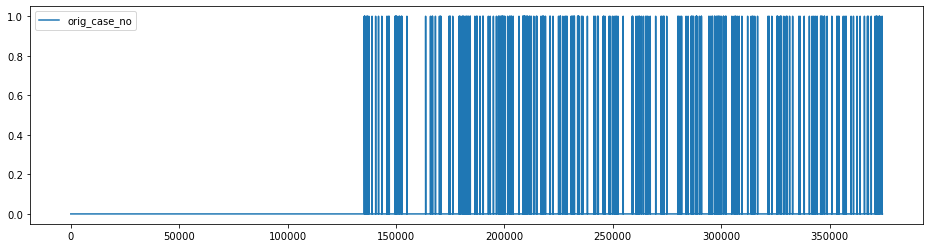


orig_file_date
281/374362 0%
Filled: |--------------------------------------------------| 0.1% Rows


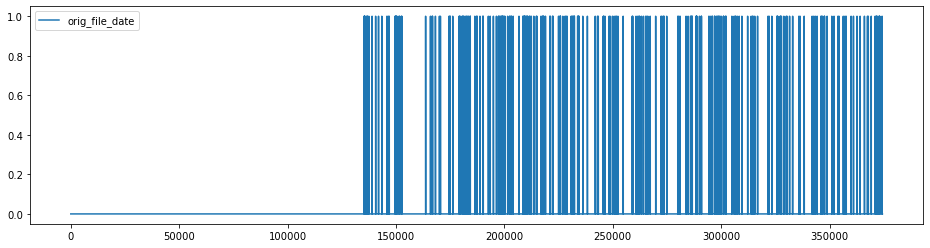


preparer_info_emp_completed
239054/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


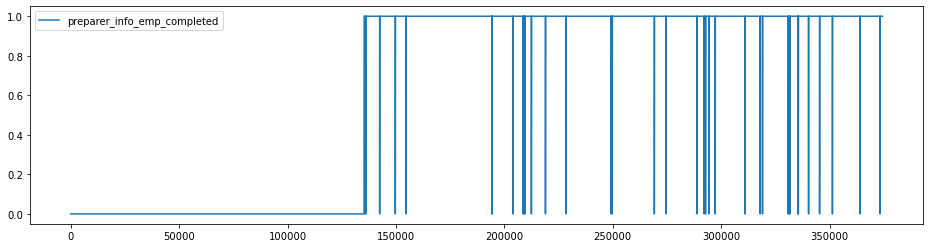


preparer_info_title
210287/374362 56%
Filled: |████████████████████████████----------------------| 56.2% Rows


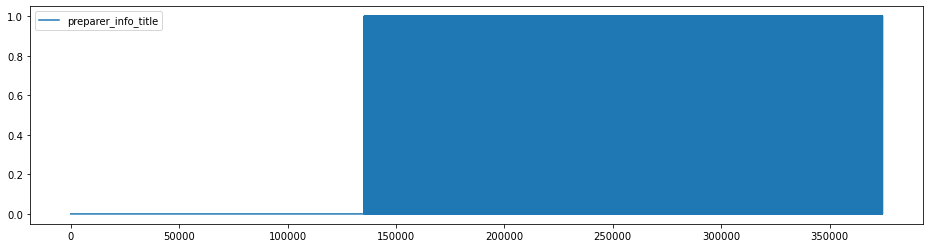


pw_amount_9089
372146/374362 99%
Filled: |█████████████████████████████████████████████████-| 99.4% Rows


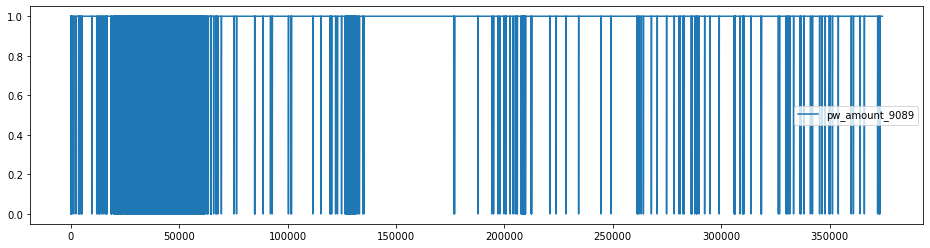


pw_determ_date
238775/374362 64%
Filled: |███████████████████████████████-------------------| 63.8% Rows


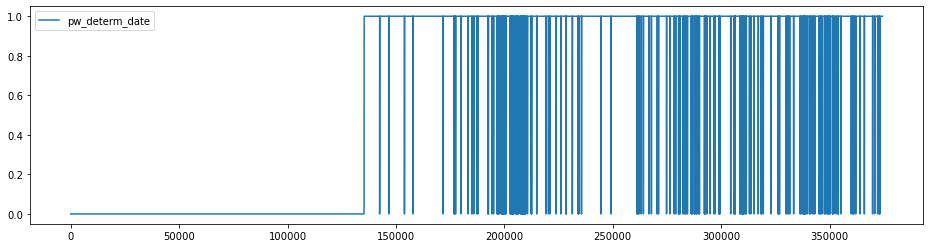


pw_expire_date
238694/374362 64%
Filled: |███████████████████████████████-------------------| 63.8% Rows


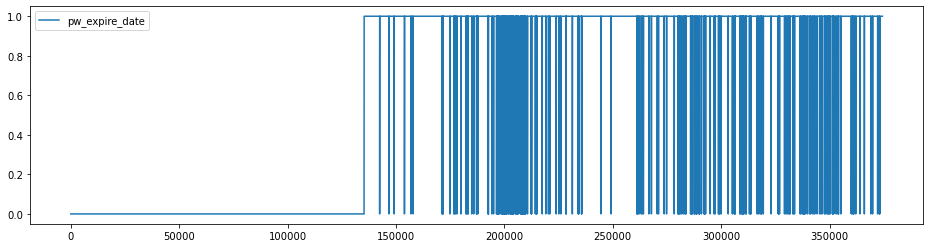


pw_job_title_908
150379/374362 40%
Filled: |████████████████████------------------------------| 40.2% Rows


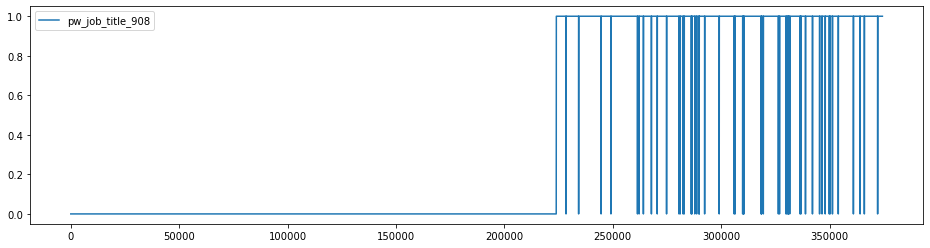


pw_job_title_9089
223591/374362 60%
Filled: |█████████████████████████████---------------------| 59.7% Rows


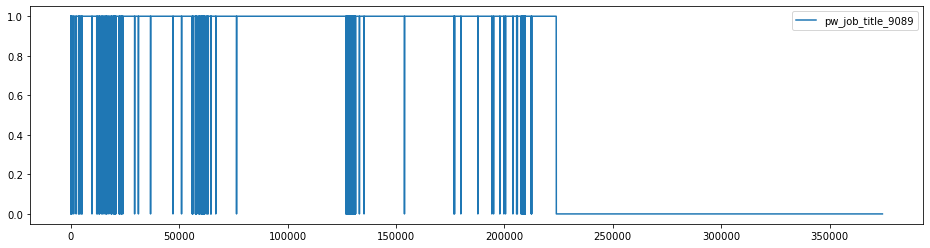


pw_level_9089
346735/374362 93%
Filled: |██████████████████████████████████████████████----| 92.6% Rows


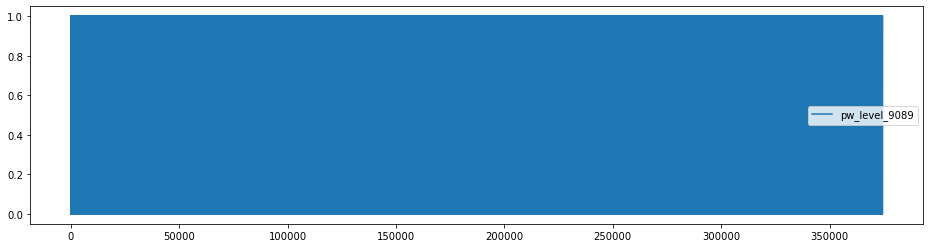


pw_soc_code
373965/374362 100%
Filled: |█████████████████████████████████████████████████-| 99.9% Rows


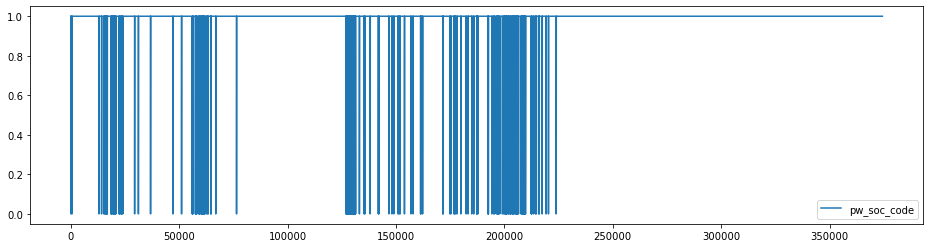


pw_soc_title
372026/374362 99%
Filled: |█████████████████████████████████████████████████-| 99.4% Rows


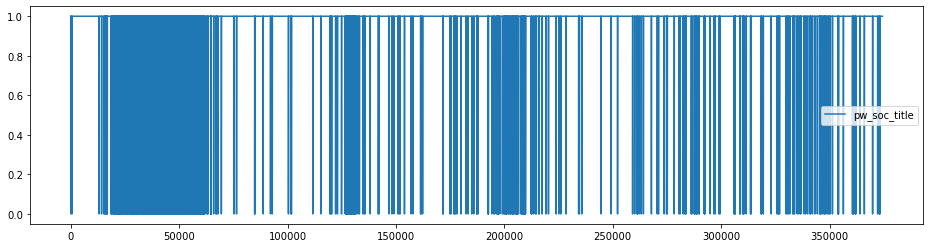


pw_source_name_9089
372263/374362 99%
Filled: |█████████████████████████████████████████████████-| 99.4% Rows


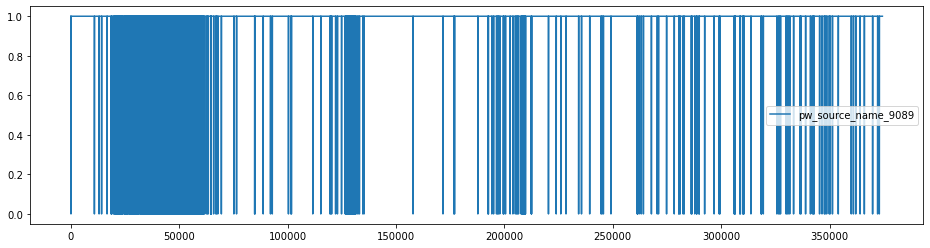


pw_source_name_other_9089
15759/374362 4%
Filled: |██------------------------------------------------| 4.2% Rows


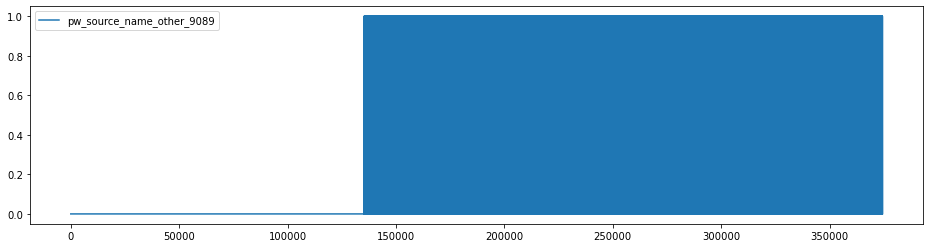


pw_track_num
237126/374362 63%
Filled: |███████████████████████████████-------------------| 63.3% Rows


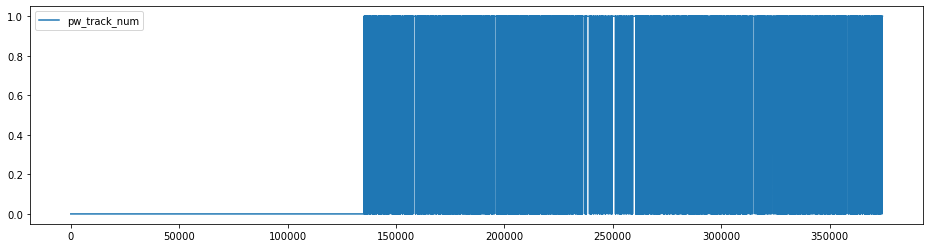


pw_unit_of_pay_9089
372790/374362 100%
Filled: |█████████████████████████████████████████████████-| 99.6% Rows


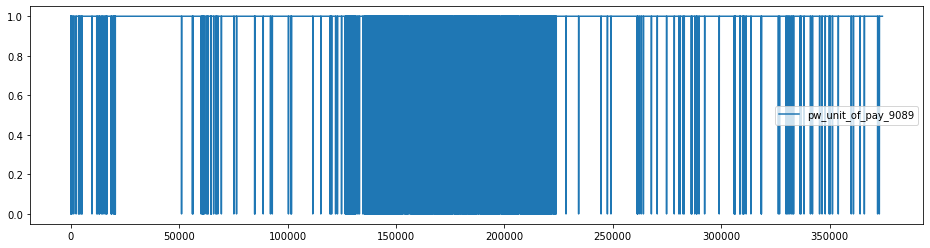


rec_info_barg_rep_notified
88574/374362 24%
Filled: |███████████---------------------------------------| 23.7% Rows


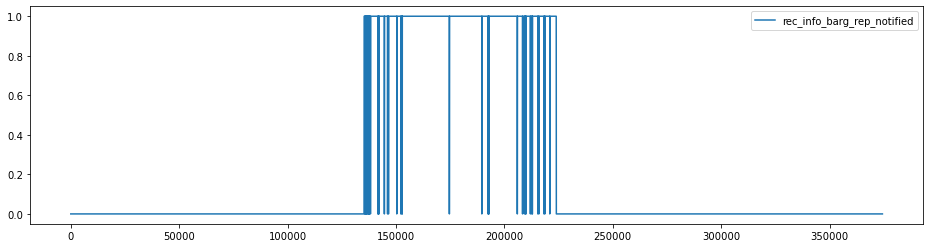


recr_info_barg_rep_notified
150430/374362 40%
Filled: |████████████████████------------------------------| 40.2% Rows


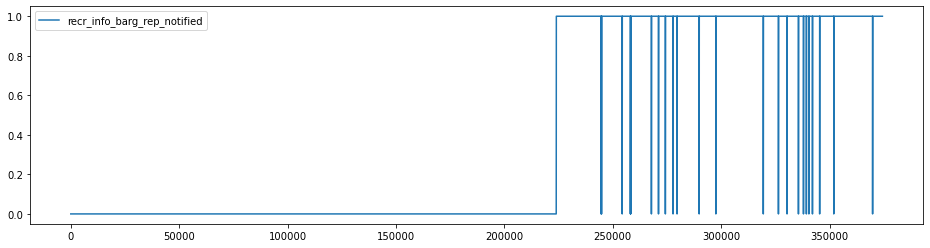


recr_info_coll_teach_comp_proc
7021/374362 2%
Filled: |--------------------------------------------------| 1.9% Rows


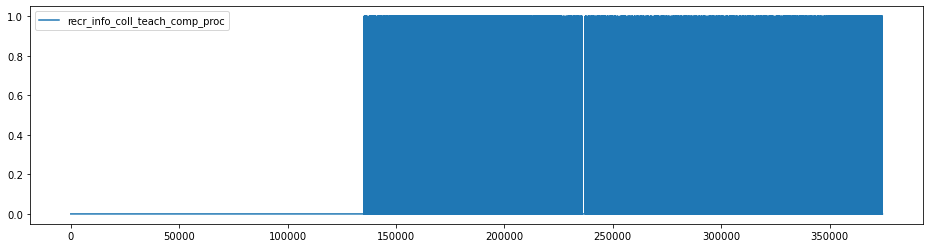


recr_info_coll_univ_teacher
239062/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


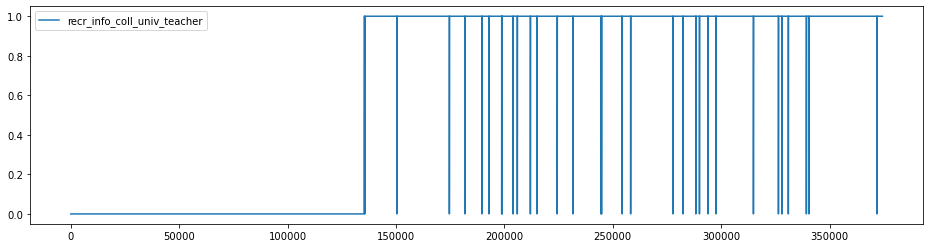


recr_info_employer_rec_payment
239073/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


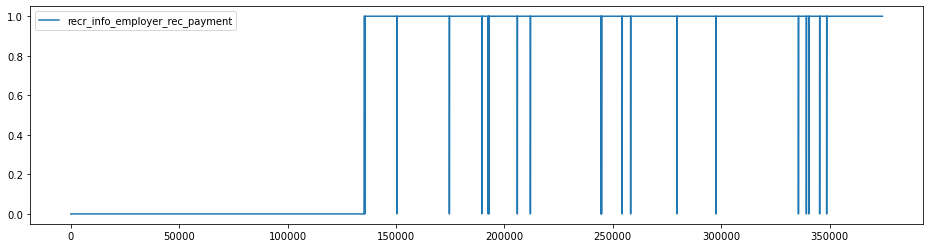


recr_info_first_ad_start
232933/374362 62%
Filled: |███████████████████████████████-------------------| 62.2% Rows


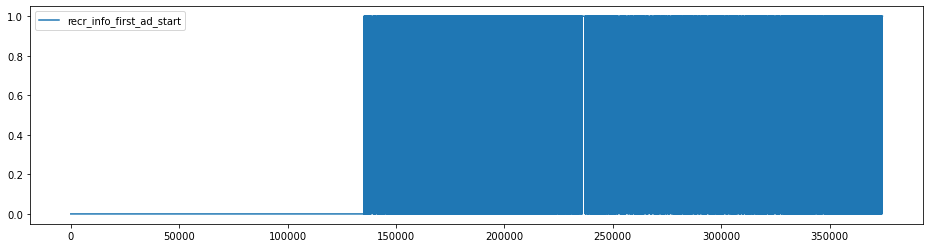


recr_info_job_fair_from
1798/374362 0%
Filled: |--------------------------------------------------| 0.5% Rows


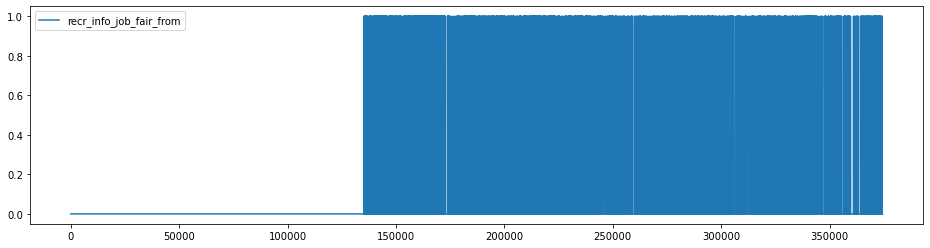


recr_info_job_fair_to
1793/374362 0%
Filled: |--------------------------------------------------| 0.5% Rows


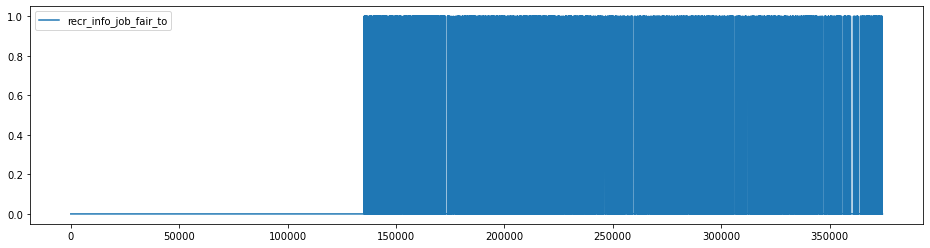


recr_info_on_campus_recr_from
1872/374362 1%
Filled: |--------------------------------------------------| 0.5% Rows


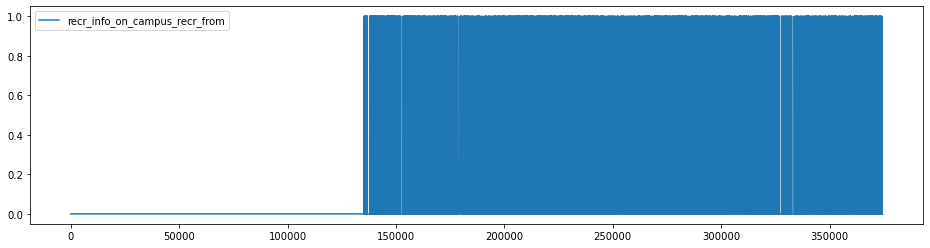


recr_info_on_campus_recr_to
1865/374362 0%
Filled: |--------------------------------------------------| 0.5% Rows


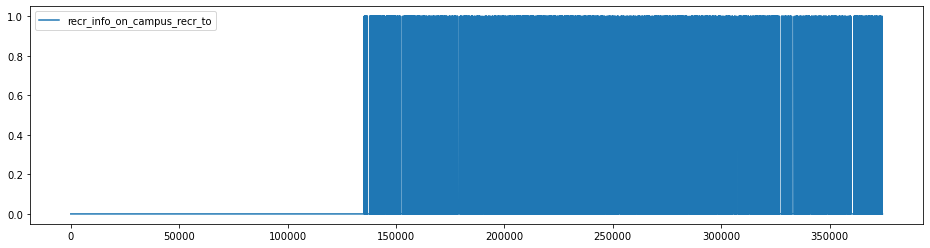


recr_info_pro_org_advert_from
14076/374362 4%
Filled: |█-------------------------------------------------| 3.8% Rows


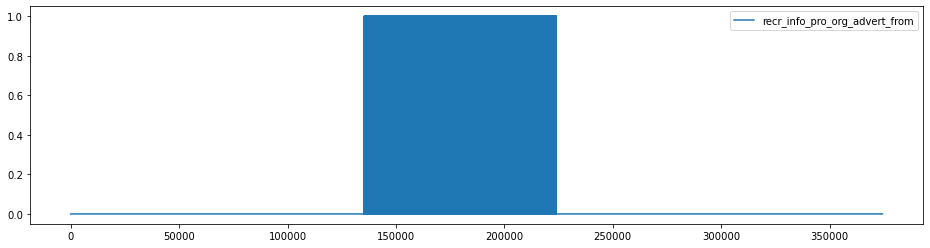


recr_info_pro_org_advert_to
14070/374362 4%
Filled: |█-------------------------------------------------| 3.8% Rows


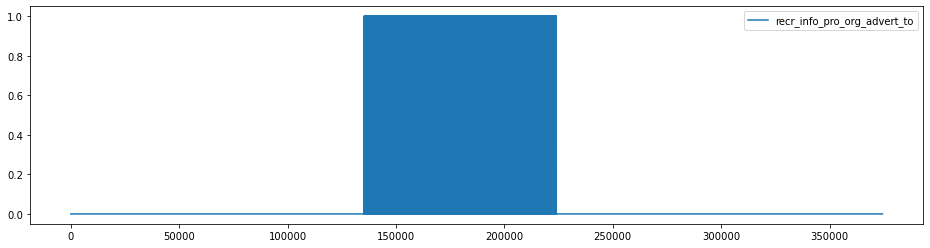


recr_info_prof_org_advert_from
28093/374362 8%
Filled: |███-----------------------------------------------| 7.5% Rows


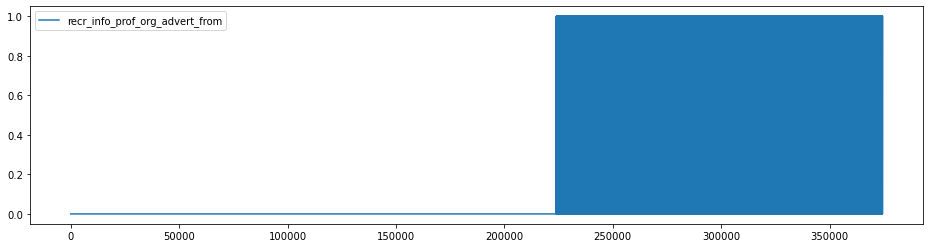


recr_info_prof_org_advert_to
28086/374362 8%
Filled: |███-----------------------------------------------| 7.5% Rows


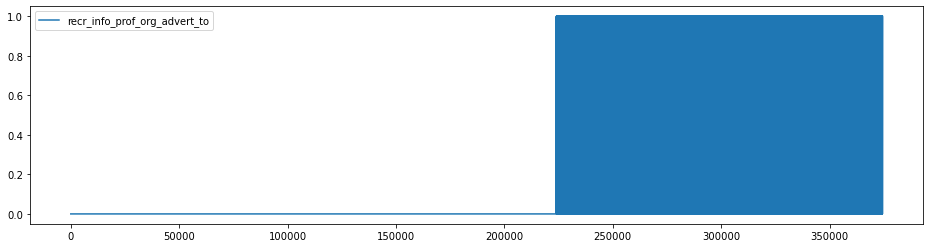


recr_info_professional_occ
239076/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


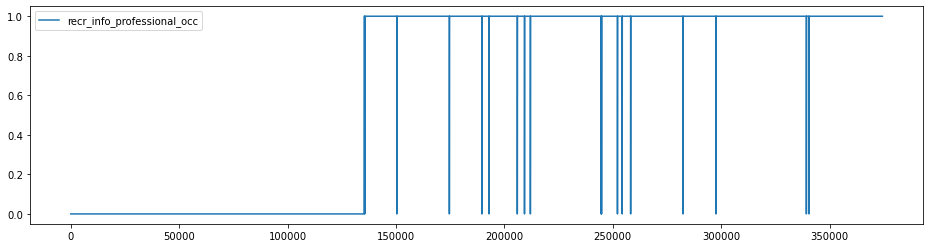


recr_info_radio_tv_ad_from
20353/374362 5%
Filled: |██------------------------------------------------| 5.4% Rows


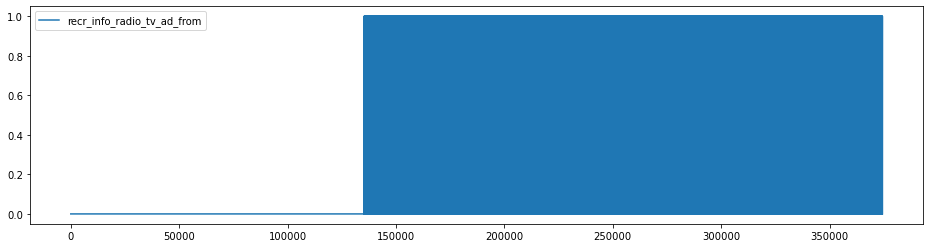


recr_info_radio_tv_ad_to
20354/374362 5%
Filled: |██------------------------------------------------| 5.4% Rows


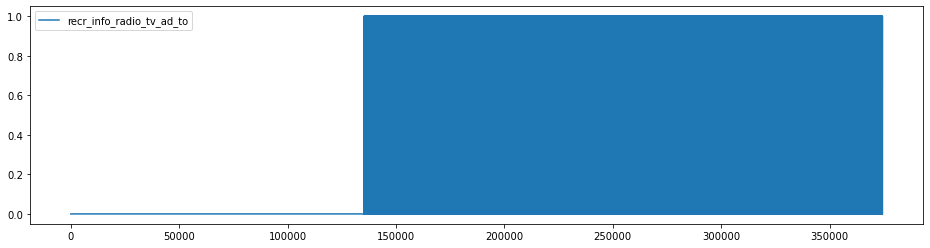


recr_info_second_ad_start
232896/374362 62%
Filled: |███████████████████████████████-------------------| 62.2% Rows


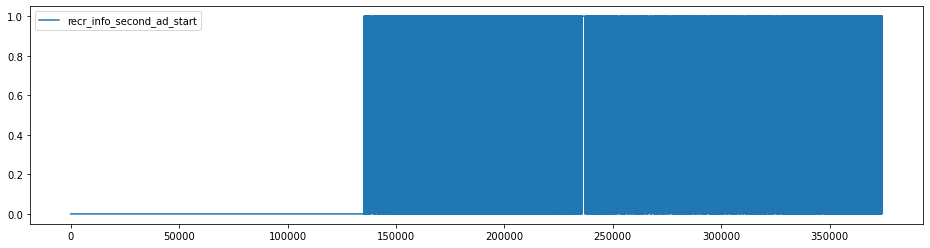


recr_info_sunday_newspaper
233022/374362 62%
Filled: |███████████████████████████████-------------------| 62.2% Rows


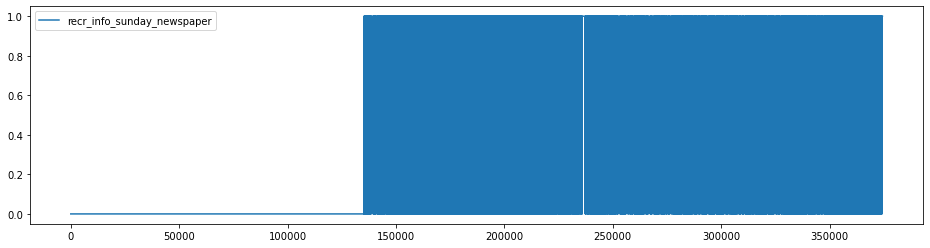


recr_info_swa_job_order_end
232897/374362 62%
Filled: |███████████████████████████████-------------------| 62.2% Rows


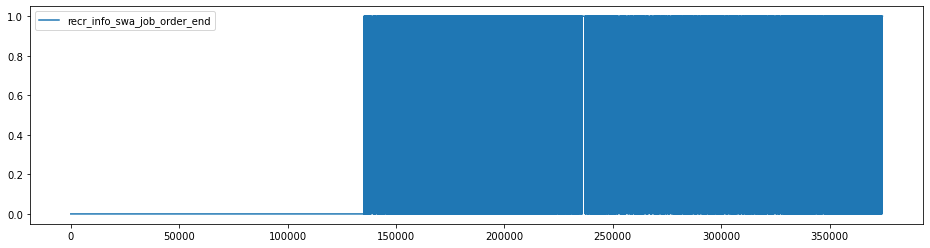


recr_info_swa_job_order_start
232919/374362 62%
Filled: |███████████████████████████████-------------------| 62.2% Rows


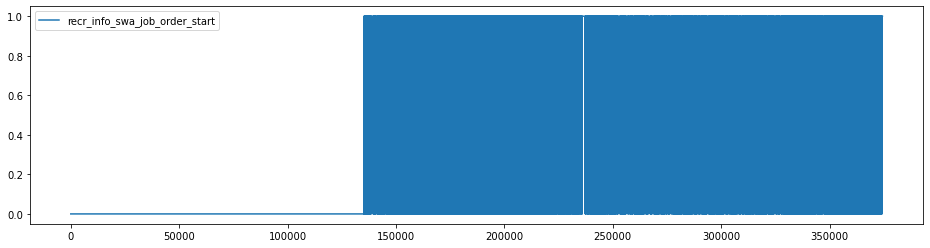


refile
118079/374362 32%
Filled: |███████████████-----------------------------------| 31.5% Rows


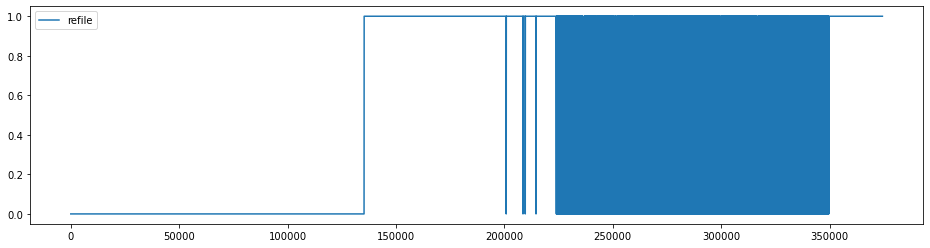


ri_1st_ad_newspaper_name
236728/374362 63%
Filled: |███████████████████████████████-------------------| 63.2% Rows


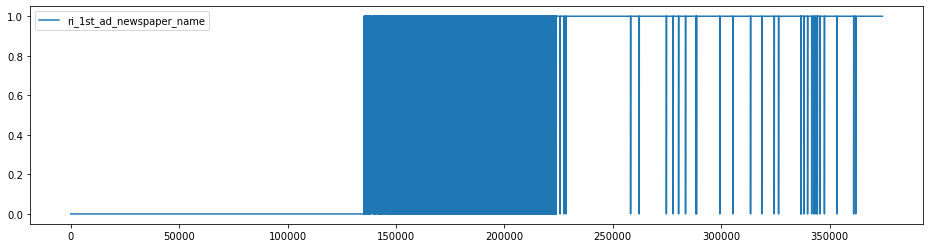


ri_2nd_ad_newspaper_name
236696/374362 63%
Filled: |███████████████████████████████-------------------| 63.2% Rows


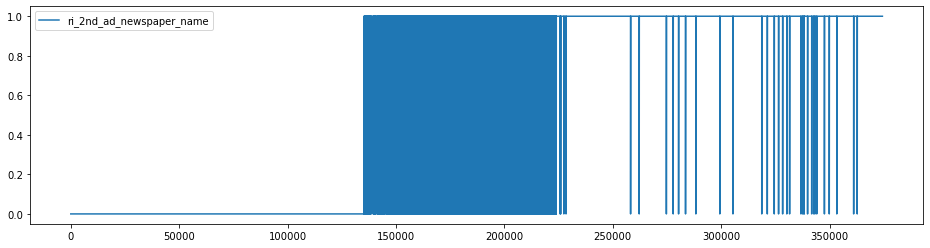


ri_2nd_ad_newspaper_or_journal
232914/374362 62%
Filled: |███████████████████████████████-------------------| 62.2% Rows


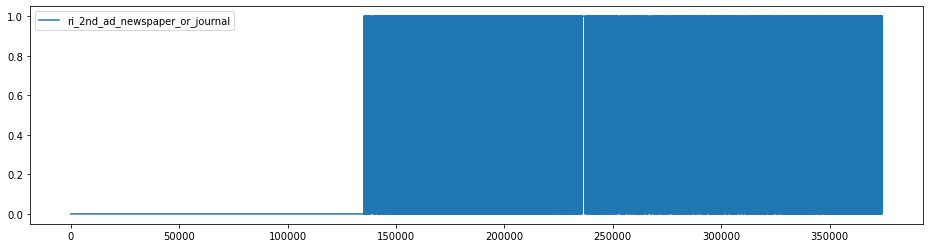


ri_campus_placement_from
30003/374362 8%
Filled: |████----------------------------------------------| 8.0% Rows


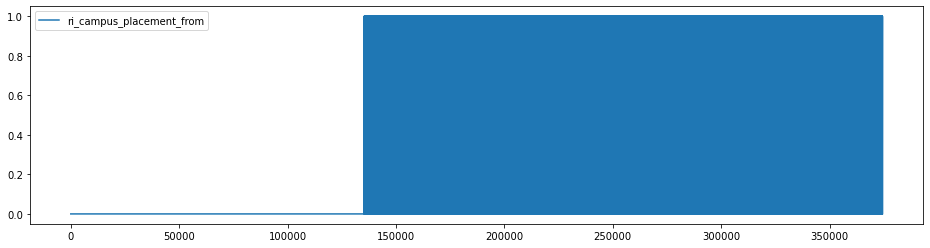


ri_campus_placement_to
29993/374362 8%
Filled: |████----------------------------------------------| 8.0% Rows


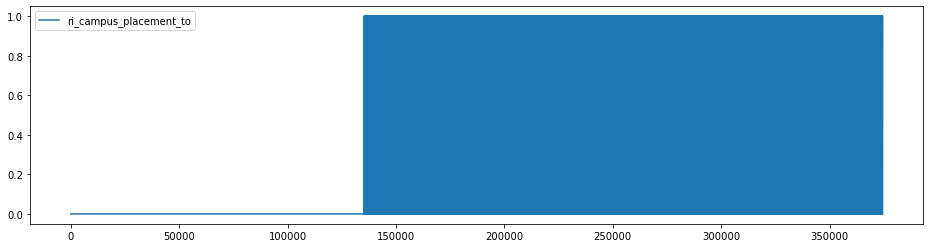


ri_coll_tch_basic_process
7013/374362 2%
Filled: |--------------------------------------------------| 1.9% Rows


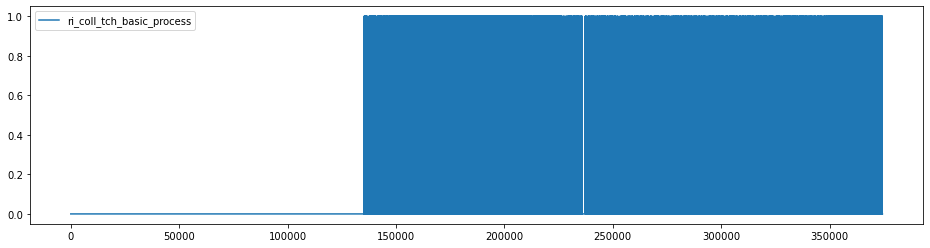


ri_coll_teach_pro_jnl
152574/374362 41%
Filled: |████████████████████------------------------------| 40.8% Rows


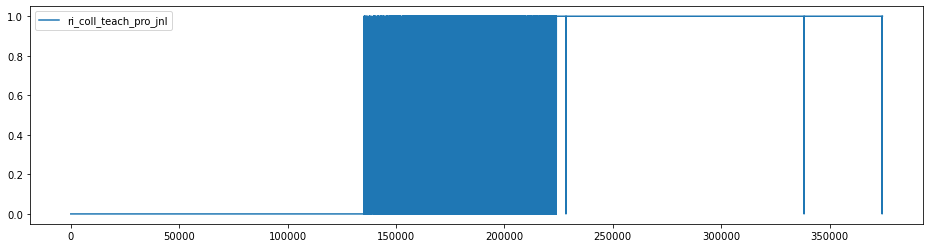


ri_coll_teach_select_date
5730/374362 2%
Filled: |--------------------------------------------------| 1.5% Rows


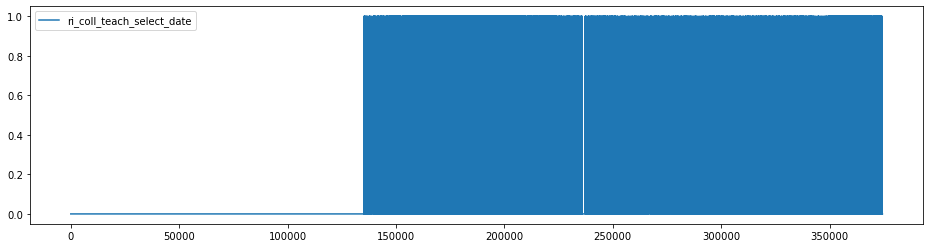


ri_employee_referral_prog_from
68721/374362 18%
Filled: |█████████-----------------------------------------| 18.4% Rows


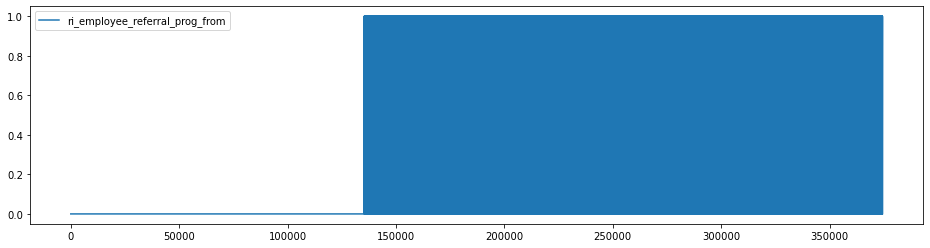


ri_employee_referral_prog_to
68722/374362 18%
Filled: |█████████-----------------------------------------| 18.4% Rows


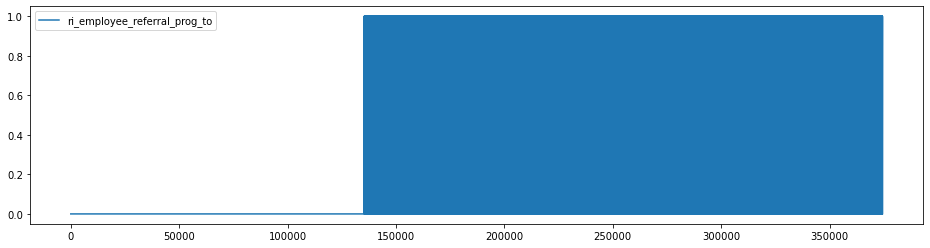


ri_employer_web_post_from
136636/374362 36%
Filled: |██████████████████--------------------------------| 36.5% Rows


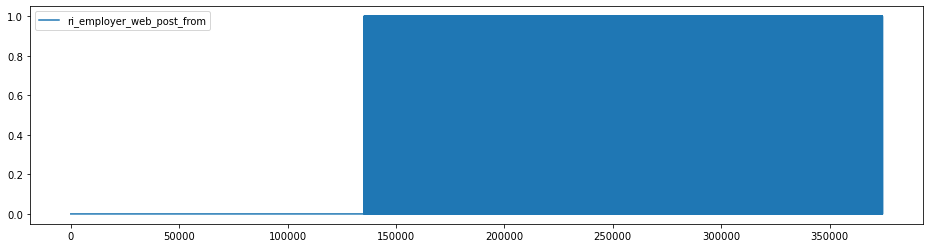


ri_employer_web_post_to
136614/374362 36%
Filled: |██████████████████--------------------------------| 36.5% Rows


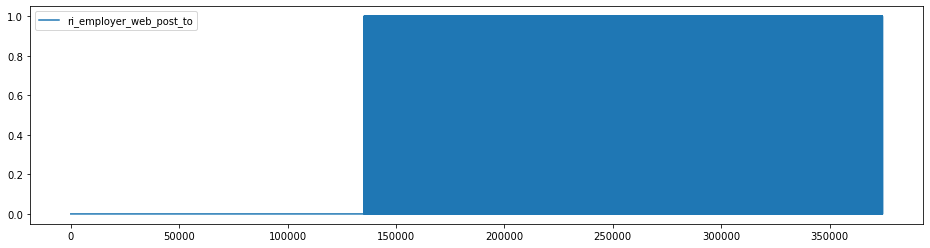


ri_job_search_website_from
196791/374362 53%
Filled: |██████████████████████████------------------------| 52.6% Rows


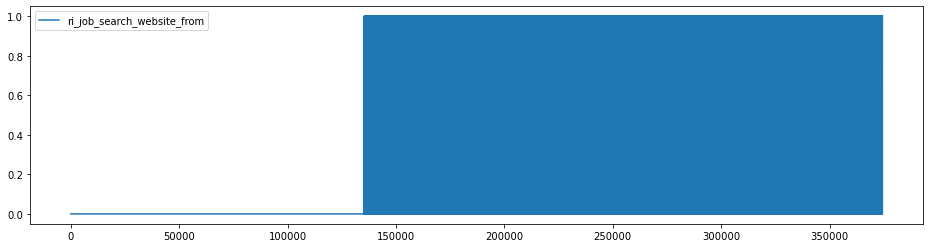


ri_job_search_website_to
196781/374362 53%
Filled: |██████████████████████████------------------------| 52.6% Rows


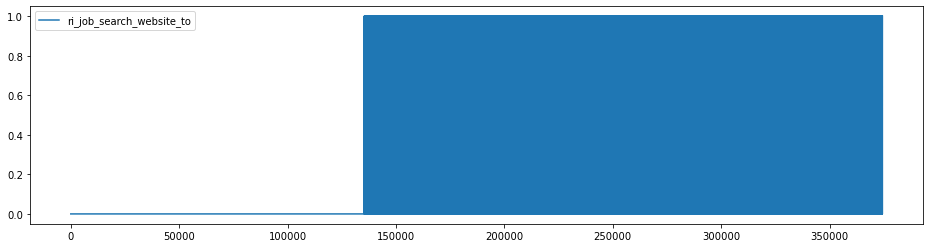


ri_layoff_in_past_six_months
239059/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


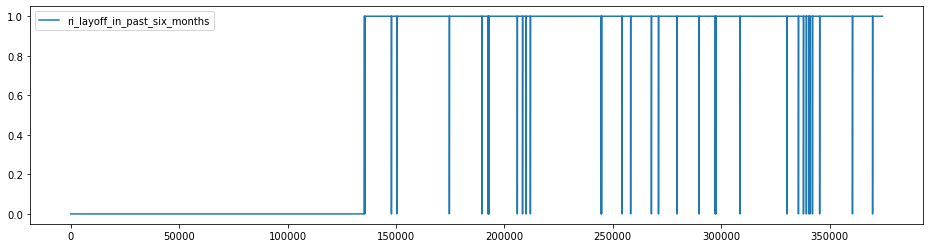


ri_local_ethnic_paper_from
120881/374362 32%
Filled: |████████████████----------------------------------| 32.3% Rows


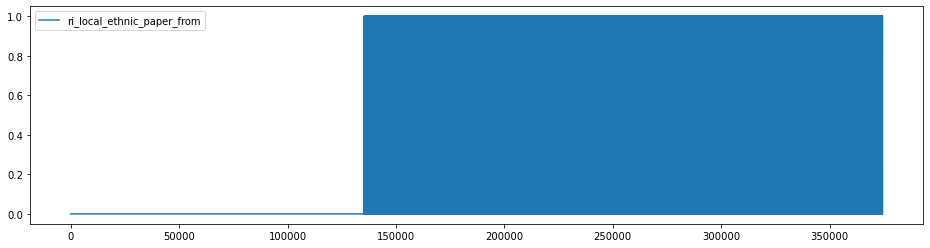


ri_local_ethnic_paper_to
120881/374362 32%
Filled: |████████████████----------------------------------| 32.3% Rows


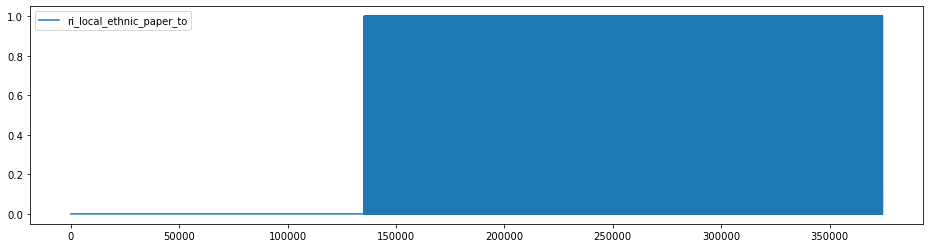


ri_posted_notice_at_worksite
239002/374362 64%
Filled: |███████████████████████████████-------------------| 63.8% Rows


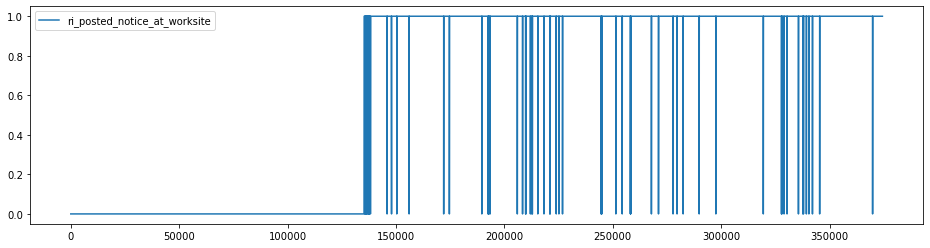


ri_pvt_employment_firm_from
16442/374362 4%
Filled: |██------------------------------------------------| 4.4% Rows


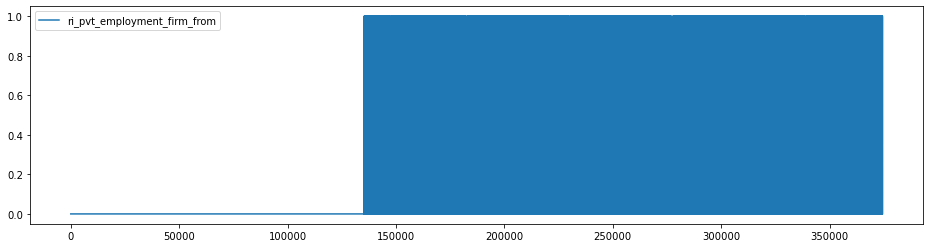


ri_pvt_employment_firm_to
16440/374362 4%
Filled: |██------------------------------------------------| 4.4% Rows


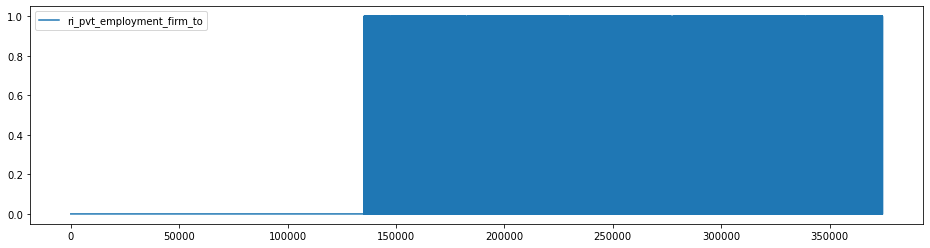


ri_us_workers_considered
17233/374362 5%
Filled: |██------------------------------------------------| 4.6% Rows


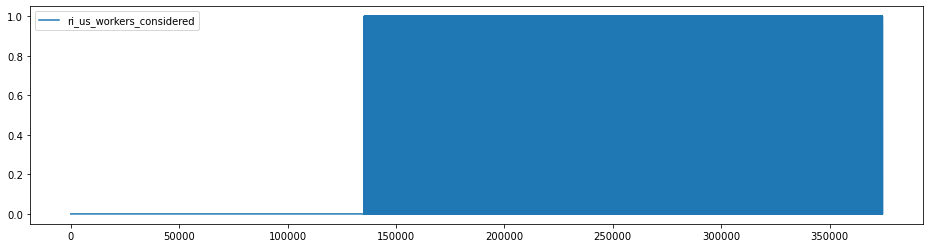


schd_a_sheepherder
239074/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


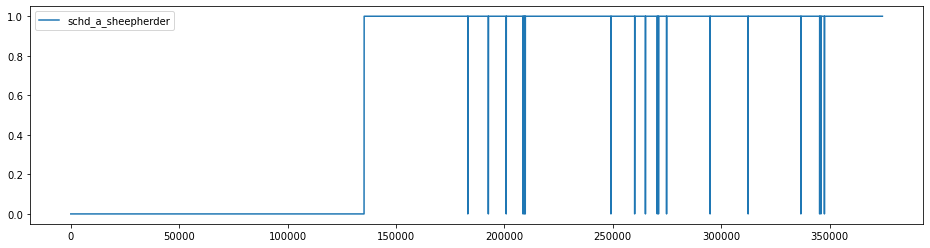


us_economic_sector
129068/374362 34%
Filled: |█████████████████---------------------------------| 34.5% Rows


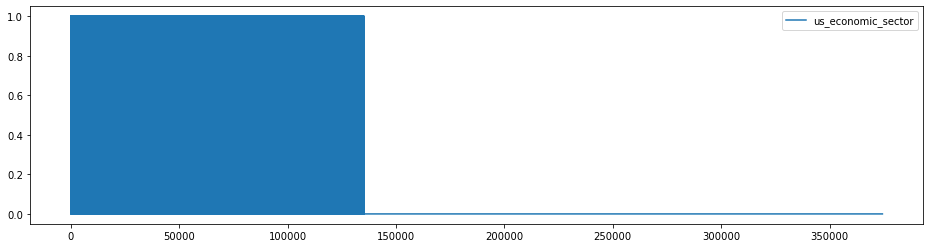


wage_offer_from_9089
259591/374362 69%
Filled: |██████████████████████████████████----------------| 69.3% Rows


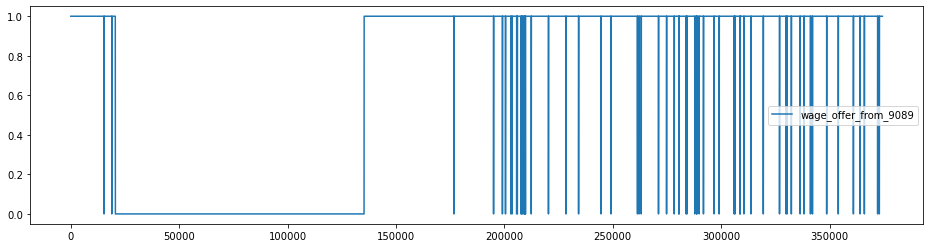


wage_offer_to_9089
73634/374362 20%
Filled: |█████████-----------------------------------------| 19.7% Rows


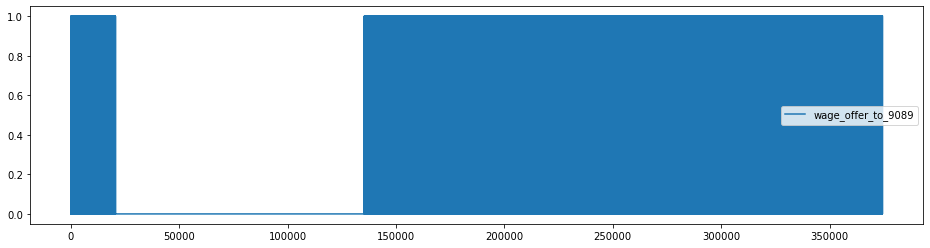


wage_offer_unit_of_pay_9089
258446/374362 69%
Filled: |██████████████████████████████████----------------| 69.0% Rows


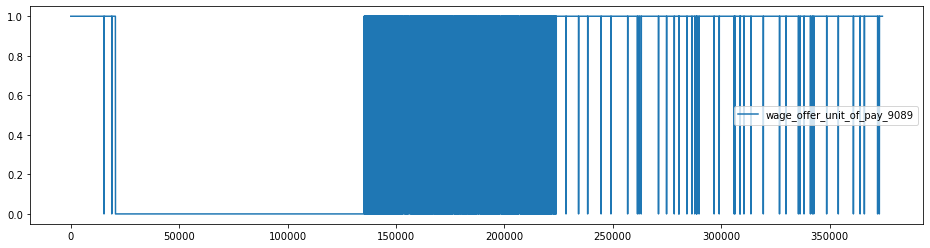


wage_offered_from_9089
114647/374362 31%
Filled: |███████████████-----------------------------------| 30.6% Rows


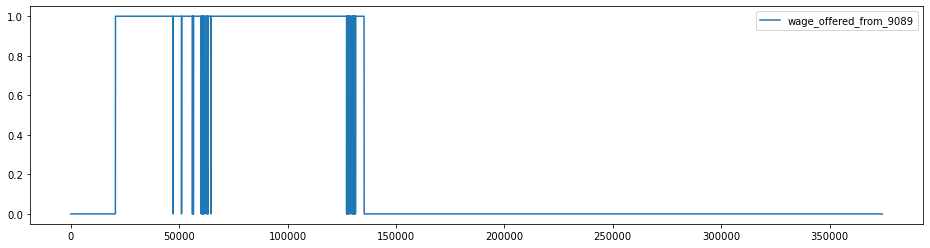


wage_offered_to_9089
31015/374362 8%
Filled: |████----------------------------------------------| 8.3% Rows


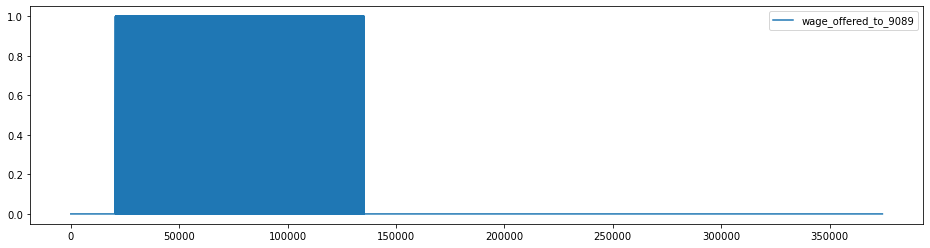


wage_offered_unit_of_pay_9089
70699/374362 19%
Filled: |█████████-----------------------------------------| 18.9% Rows


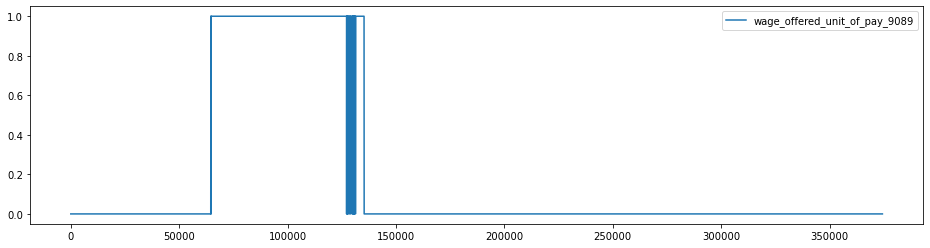


Case_No_merged
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows


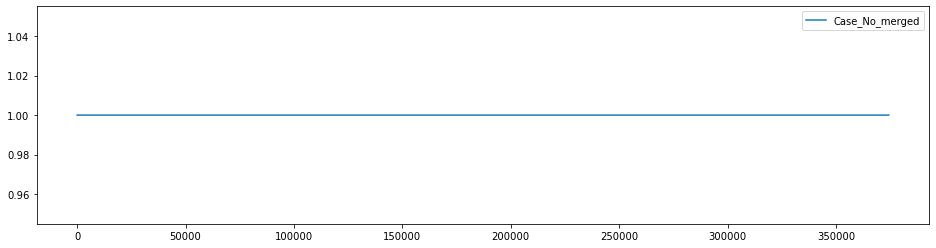

In [36]:
import modules
modules.print_count_of_values_relation(visas_df, True, True)

In [6]:
index = visas_df.index
number_of_rows = len(index)

print(number_of_rows)

headers = list(visas_df)

for x in list(visas_df):
    column = (headers.pop(0))
    print(column)
    # display(Markdown("# " + column_object))
    print(str(visas_df[column].count()) + "/" + str(number_of_rows) + str(visas_df[column].count()/number_of_rows))
    # print('')


374362
add_these_pw_job_title_9089
42194/3743620.11270908906352675
agent_city
211454/3743620.5648383115807695
agent_firm_name
206997/3743620.5529327228725137
agent_state
208239/3743620.556250367291552
application_type
135269/3743620.36133207964483577
case_no
135269/3743620.36133207964483577
case_number
239093/3743620.6386679203551643
case_received_date
239091/3743620.6386625779325893
case_status
374362/3743621.0
class_of_admission
351517/3743620.9389761781377384
country_of_citizenship
353729/3743620.9448848975056229
country_of_citzenship
20574/3743620.054957501028416345
decision_date
374362/3743621.0
employer_address_1
374320/3743620.9998878091259262
employer_address_2
225169/3743620.6014739743884262
employer_city
374348/3743620.9999626030419754
employer_country
239019/3743620.6384702507198915
employer_decl_info_title
239054/3743620.6385637431149529
employer_name
374350/3743620.9999679454645504
employer_num_employees
239013/3743620.6384542234521666
employer_phone
239057/3743620.6385717

70699/3743620.18885196681287097


## Print infos

In [7]:
def print_info_of_str_column(column_object):
    print('###################################')
    print(column_object)
    print('')
    #display(Markdown("# " + column_object))
    print((visas_df[column_object].value_counts()))
    print('###################################')
    print('')

In [8]:
headers = list(visas_df)
for x in list(visas_df):
    print_info_of_str_column(headers.pop(0))


###################################
add_these_pw_job_title_9089

Software Developers, Applications                10042
Computer Systems Analysts                         3040
Software Developers, Systems Software             1930
Electronics Engineers, Except Computer            1493
Computer Systems Analyst                           909
                                                 ...  
1ST LINE SUPERVISORS OF CONSTRUCTION TRADES &        1
Food Services Manager                                1
Electronics Engineers, except computer               1
Store Operations Manager                             1
Thermoacoustics Engineer                             1
Name: add_these_pw_job_title_9089, Length: 4276, dtype: int64
###################################

###################################
agent_city

New York         19359
San Francisco    18603
Boston            8591
Santa Clara       7769
Chicago           7555
                 ...  
Kensington           1
Forth Worth          1

COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION    12081
MICROSOFT CORPORATION                             8369
INTEL CORPORATION                                 6564
GOOGLE INC.                                       5165
AMAZON CORPORATE LLC                              3719
                                                 ...  
The Tennis Team LLC                                  1
HMSHOST CORPORATION                                  1
MURPHY/JAHN ARCHITECTS, LLC                          1
HANSOFT INC                                          1
MIRACLE SOFTWARE INC                                 1
Name: employer_name, Length: 71709, dtype: int64
###################################

###################################
employer_num_employees

29000.0    4581
35000.0    4417
60000.0    3921
40000.0    2647
5.0        2615
           ... 
11728.0       1
42500.0       1
31200.0       1
10146.0       1
5811.0        1
Name: employer_num_employees, Length: 4559, dtype: int64
################

INDIA                     81335
CHINA                     13757
SOUTH KOREA               12152
MEXICO                     3381
PHILIPPINES                2722
                          ...  
BRITISH VIRGIN ISLANDS        1
NETHERLANDS ANTILLES          1
MALDIVES                      1
CHAD                          1
PAPUA NEW GUINEA              1
Name: fw_info_birth_country, Length: 193, dtype: int64
###################################

###################################
fw_info_education_other

None                                                          143672
MEDICAL DEGREE                                                   639
MD                                                               393
M.D.                                                             239
3-YR POST SECONDARY EDUCATION *SEE H.14                          191
                                                               ...  
3 YEARS OF ACADEMIC STUDIES TOWARD BACHELOR OF ARTS DEGREE         1
DOCTOR OF ME

See H.14                                                                                                2829
Computer Software Professional                                                                          2092
Computer-related occupation                                                                             1468
computer-related occupation                                                                             1249
Related Occupation                                                                                      1209
                                                                                                        ... 
Programmer Analyst; Technical Lead; Senior Systems Engineer or related                                     1
Associate, Technology Analyst or related                                                                   1
Computer Sys Analyst, Project Lead, Lead Engineer, Sr. Software Engineer or any IT related positions       1
Job offered or Qual

541511      2514
541511.0    1586
541512       599
611310.0     538
611310       469
            ... 
623311         1
61163.0        1
327991         1
336330         1
339113.0       1
Name: naics_2007_us_code, Length: 1804, dtype: int64
###################################

###################################
naics_2007_us_title

Custom Computer Programming Services                                                           4100
Colleges, Universities, and Professional Schools                                               1067
Computer Systems Design Services                                                                920
Computer Systems Design and Related Services                                                    631
Software Publishers                                                                             618
                                                                                               ... 
Correctional Institutions                                         

Level II     119625
Level IV      96550
Level I       65687
Level III     64873
Name: pw_level_9089, dtype: int64
###################################

###################################
pw_soc_code

15-1132       114857
15-1121        33926
15-1133        21357
17-2072        11713
11-3021         6727
               ...  
43-9199.99         1
39-3092            1
29-2041            1
51-7032.00         1
51-5022.00         1
Name: pw_soc_code, Length: 1382, dtype: int64
###################################

###################################
pw_soc_title

Software Developers, Applications                  114841
Computer Systems Analysts                           36700
Software Developers, Systems Software               21356
Electronics Engineers, Except Computer              13192
Computer and Information Systems Managers            9631
                                                    ...  
Vocational Education Teachers, Secondary School         1
Nuclear Technicians           

Y    231691
N      1331
Name: recr_info_sunday_newspaper, dtype: int64
###################################

###################################
recr_info_swa_job_order_end

2013-08-06    2493
2016-02-17    2467
2014-10-10    2347
2014-02-21    2079
2014-07-07    1826
              ... 
2008-07-10       1
2012-03-11       1
2010-03-17       1
2009-11-09       1
2010-02-12       1
Name: recr_info_swa_job_order_end, Length: 2473, dtype: int64
###################################

###################################
recr_info_swa_job_order_start

2016-01-15    2557
2013-07-02    2514
2014-09-08    2325
2014-01-21    2059
2015-01-20    1550
              ... 
2010-02-27       1
2008-07-16       1
2010-02-11       1
2009-05-22       1
2011-10-06       1
Name: recr_info_swa_job_order_start, Length: 2249, dtype: int64
###################################

###################################
refile

N    117930
Y       149
Name: refile, dtype: int64
###################################

##########

72,467.00     2775
81765.0       2102
54,059.00     1557
90000.0       1455
76,378.00     1384
              ... 
94516.8          1
74,238.00        1
119950.0         1
145,003.06       1
49,254.00        1
Name: wage_offer_from_9089, Length: 38945, dtype: int64
###################################

###################################
wage_offer_to_9089

160000.0      1519
145300.0      1243
135,000.00    1000
145,300.00     942
160,000.00     911
              ... 
176,635.00       1
43080.0          1
97,499.00        1
169928.0         1
97550.0          1
Name: wage_offer_to_9089, Length: 14053, dtype: int64
###################################

###################################
wage_offer_unit_of_pay_9089

Year         230591
yr            19733
Hour           7038
hr              781
Week            142
Month            81
wk               30
mth              21
Bi-Weekly        20
bi                9
Name: wage_offer_unit_of_pay_9089, dtype: int64
#############################

## Merge Columns

In this case: case_no, case_number

In [9]:
cols = [['case_no', 'case_number']]

Values are getting concatenated.

In [10]:
visas_df['Case_No_merged'] = visas_df['case_no'].fillna('') + visas_df['case_number'].fillna('')

Check if there are duplicates.

In [11]:
visas_df['Case_No_merged'].value_counts()

A-14160-76066    3
A-13252-95111    2
A-15258-17698    2
A-15308-36011    2
A-14020-34078    2
                ..
A-10309-30142    1
A-15042-49914    1
A-13060-44823    1
A-15238-11835    1
A-15245-14044    1
Name: Case_No_merged, Length: 373025, dtype: int64

Duplicate Values are existing - CaseNo is no key value.

Check the length of all concatenated strings. If the merging process was succesful, there should be no length over 13.
Also der should be no NaN or Null values.

In [12]:
visas_df['Case_No_merged'].str.len().value_counts()

13    374362
Name: Case_No_merged, dtype: int64

In [13]:
print('NaN values in case_number:')
print(visas_df['case_number'].isna().sum())
print('NaN values in case_no:')
print(visas_df['case_no'].isna().sum())
print('NaN Values combined:')
print(visas_df['case_number'].isna().sum() + visas_df['case_no'].isna().sum())


NaN values in case_number:
135269
NaN values in case_no:
239093
NaN Values combined:
374362


In [14]:
visas_df['Case_No_merged'].str.len()

0         13
1         13
2         13
3         13
4         13
          ..
374357    13
374358    13
374359    13
374360    13
374361    13
Name: Case_No_merged, Length: 374362, dtype: int64

In [15]:
visas_df['Case_No_merged'].isna().sum()

0

CaseNumber is completely filled. No Null Values.

<AxesSubplot:>

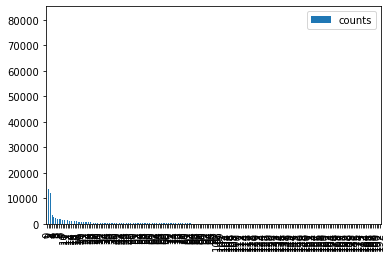

In [16]:
unique_values_df = visas_df['fw_info_birth_country'].value_counts().rename_axis('unique values').reset_index(name='counts')
unique_values_df
unique_values_df.sort_values(by='counts', ascending = False).plot.bar()

<AxesSubplot:>

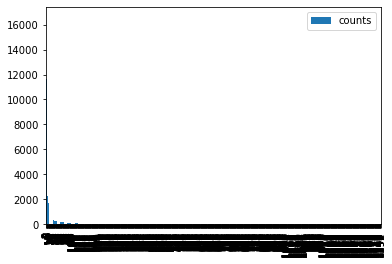

In [17]:


unique_values_df = visas_df['naics_title'].value_counts().rename_axis('unique values').reset_index(name='counts')
unique_values_df
unique_values_df.sort_values(by='counts', ascending = False).plot.bar()

       unique values  counts
0          Certified  181933
1  Certified-Expired  148586
2             Denied   25649
3          Withdrawn   18194


<AxesSubplot:title={'center':'Ice Cream Sales'}, xlabel='unique values'>

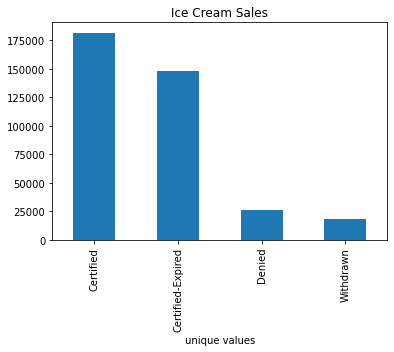

In [18]:
unique_values_df = visas_df['case_status'].value_counts().rename_axis('unique values').reset_index(name='counts')
#unique_values_df = visas_df['case_status'].value_counts().rename_axis('unique values').reset_index(level=0, inplace=True)

print(unique_values_df)
unique_values_df.sort_values(by='counts', ascending = False).plot(kind='bar', x='unique values', y='counts', legend=None, title='Ice Cream Sales')




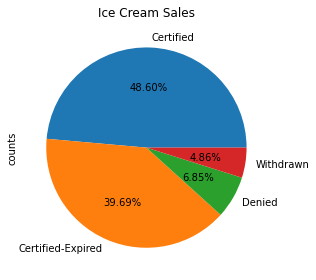

In [19]:
unique_values_df.plot(kind='pie', labels=unique_values_df['unique values'], y='counts', legend=None, autopct='%.2f%%', title='Ice Cream Sales')
plt.tight_layout()
plt.show()


---
## In welchen US Bundesstasaten ist der Bedarf an Fachkräften am größten?
Die benötigten Spalten sind dafür:
- employer_state

Werfen wir einen Blick in employer_state:



In [20]:
print(visas_df['employer_state'].value_counts())

print(visas_df['employer_state'].describe(include=[object]))

print(visas_df['employer_state'].head())

CALIFORNIA                  51127
CA                          42366
TEXAS                       25082
TX                          20099
NEW JERSEY                  16271
                            ...  
NORTHERN MARIANA ISLANDS       22
VI                             18
BRITISH COLUMBIA                3
MARSHALL ISLANDS                1
BC                              1
Name: employer_state, Length: 113, dtype: int64
count         374320
unique           113
top       CALIFORNIA
freq           51127
Name: employer_state, dtype: object
0    NY
1    NY
2    VA
3    NY
4    NY
Name: employer_state, dtype: object


It becomes apparent, that abbreviations are used in the mix with the regular state names.
We'll have to translate the values to either only-abbreviation-values or long notations only.

We have found online a table which shows  all abbreviations of the US states: https://docs.omnisci.com/v4.1.1/3_apdx_states.html

Let's read it into a dataframe.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

table_MN = pd.read_html('https://docs.omnisci.com/v4.1.1/3_apdx_states.html')

In [22]:
print(f'Total tables: {len(table_MN)}')

Total tables: 2


pandas found two tables on the specified website

Let's try it once more, but now with a specified keyword.

In [23]:
table_MN = pd.read_html('https://docs.omnisci.com/v4.1.1/3_apdx_states.html', match='Abbreviation')
print(f'Total tables: {len(table_MN)}')

Total tables: 1


Jackpot 🎉

Next steps: Convert it to a dataframe.

In [24]:
states_abbreviations_df = table_MN[0]
states_abbreviations_df.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [25]:
states_abbreviations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State         52 non-null     object
 1   Abbreviation  52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes


We need to convert the State names into Uppercase Values

In [26]:
states_abbreviations_df['State'] = states_abbreviations_df['State'].str.upper()

Now we'll create a dictionary for all lookup values, so pandas know what it should replace, with which values.
We chose to use replace all names with their abbreviations. So that typos in the state names won't be replaced and we can still analyze them.

In [27]:
#create a dictionary from the lookup
repl = states_abbreviations_df.set_index('State')['Abbreviation'].to_dict()

In [28]:
visas_df['employer_state'] = visas_df['employer_state'].replace(repl)

In [29]:
visas_df['employer_state'].value_counts()

CA                          93493
TX                          45181
NJ                          30135
NY                          28075
WA                          17113
                            ...  
NORTHERN MARIANA ISLANDS       22
VI                             18
BRITISH COLUMBIA                3
MARSHALL ISLANDS                1
BC                              1
Name: employer_state, Length: 61, dtype: int64

The Data transformation worked 😃, but there's still some work to do.
It seems as some states were not represented in the abbreviation table.
Let's take a closer look.

All abbreviations are two letters long. We have to look out for all values with more than two letters.

In [30]:

df_temp = pd.DataFrame(visas_df.loc[visas_df['employer_state'].str.len() >2, 'employer_state'])

In [31]:
df_temp.value_counts()

employer_state          
GUAM                        138
VIRGIN ISLANDS               49
NORTHERN MARIANA ISLANDS     22
BRITISH COLUMBIA              3
MARSHALL ISLANDS              1
dtype: int64

In [32]:
del df_temp

The remaining entries are foreign territories of the USA. These have no official abbreviation.
Fortunately there are no Typos in this column, because every other entry could be matched.

Außengebiet der Vereinigten Staaten

Territories of the United States
https://en.wikipedia.org/wiki/Territories_of_the_United_States




We converted the spellings of the US states. Now it's time to visualize the results.
The visualisation will cover 61 unique values, so we'll choose a classic bar chart.


In [33]:

unique_values_df = visas_df['employer_state'].value_counts().rename_axis('unique values').reset_index(name='counts')
unique_values_df

,unique values,counts
0,CA,93493
1,TX,45181
2,NJ,30135
3,NY,28075
4,WA,17113
...,...,...
56,NORTHERN MARIANA ISLANDS,22
57,VI,18
58,BRITISH COLUMBIA,3
59,MARSHALL ISLANDS,1


<AxesSubplot:title={'center':'Count of Employer states'}, xlabel='unique values'>

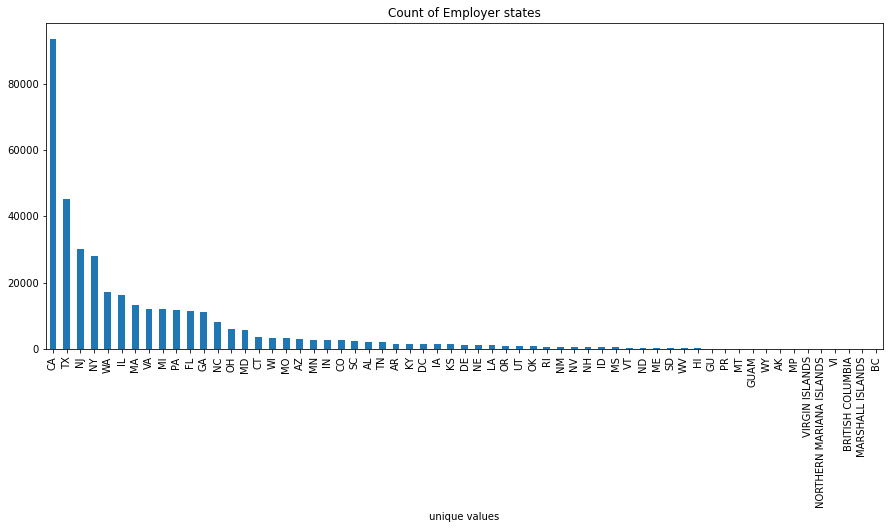

In [34]:
unique_values_df.sort_values(by='counts', ascending = False).plot(kind='bar', x='unique values', y='counts', legend=None, title='Count of Employer states', figsize=(15,6))
